## Importing all the necessary packages

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, make_scorer, fbeta_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statistics import stdev, mean
from sklearn.utils import resample
from sklearn.svm import SVC
import scipy.sparse as sp
import lime
import lime.lime_tabular
import shap
from lime.lime_tabular import LimeTabularExplainer



## Importing the dataset

In [237]:
df = pd.read_csv('bank_data_train.csv')
df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0                NaN              0.541683                0  156067.339767   
1                NaN              0.000000                0    4278.845817   
2                NaN              0.000000                0  112837.062817   
3                NaN              0.005874                0   42902.902883   
4                NaN              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC     CLNT_JOB_POSITION APP_DRIVING_LICENSE  \
0                 0.0      начальник отдела                 NaN   
1                 0.0                   NaN                 NaN   
2                 0.0  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                 NaN   
3                 0.0          МЕНЕДЖЕР ИАО                 NaN   
4                 0.0                   NaN                 NaN   

   TRANS_COUNT_SUP_PRC APP_EDUCATION  CNT_TRAN_CLO_TENDENCY1M  \
0             0.000000           NaN                      NaN  

## Dropping the CLNT_JOB_POSITION feature

In [239]:
df = df.drop(columns=['CLNT_JOB_POSITION'])
df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0                NaN              0.541683                0  156067.339767   
1                NaN              0.000000                0    4278.845817   
2                NaN              0.000000                0  112837.062817   
3                NaN              0.005874                0   42902.902883   
4                NaN              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC APP_DRIVING_LICENSE  TRANS_COUNT_SUP_PRC APP_EDUCATION  \
0                 0.0                 NaN             0.000000           NaN   
1                 0.0                 NaN             0.454545           NaN   
2                 0.0                 NaN             0.000000           NaN   
3                 0.0                 NaN             0.000000           NaN   
4                 0.0                 NaN             0.000000           NaN   

   CNT_TRAN_CLO_TENDENCY1M  SUM_TRAN_MED_TENDENCY1

## Importing the dataset with translated values for CLNT_JOB_POSITION

In [241]:
temp_df = pd.read_csv('bank_data_trainClientJob.csv', low_memory=False)
temp_df = temp_df[['ID', 'CLNT_JOB_POSITION']]
print(temp_df.columns)
temp_df.head()


Index(['ID', 'CLNT_JOB_POSITION'], dtype='object')


ID CLNT_JOB_POSITION
0  146841   Department head
1  146842               NaN
2  146843               CEO
3  146844       IAO MANAGER
4  146845               NaN

## Joining both the datasets

In [243]:
# Merge the two DataFrames on 'ID'
merged_df = pd.merge(df, temp_df, on='ID', how='left')

# Update the original df with the new column
df['CLNT_JOB_POSITION'] = merged_df['CLNT_JOB_POSITION']
df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0                NaN              0.541683                0  156067.339767   
1                NaN              0.000000                0    4278.845817   
2                NaN              0.000000                0  112837.062817   
3                NaN              0.005874                0   42902.902883   
4                NaN              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC APP_DRIVING_LICENSE  TRANS_COUNT_SUP_PRC APP_EDUCATION  \
0                 0.0                 NaN             0.000000           NaN   
1                 0.0                 NaN             0.454545           NaN   
2                 0.0                 NaN             0.000000           NaN   
3                 0.0                 NaN             0.000000           NaN   
4                 0.0                 NaN             0.000000           NaN   

   CNT_TRAN_CLO_TENDENCY1M  SUM_TRAN_MED_TENDENCY1

## Converting Russian values in CLNT_TRUST_RELATION

In [245]:
df['CLNT_TRUST_RELATION'].unique()

array([nan, 'MOTHER', 'BROTHER', 'FRIEND', 'SISTER', 'OTHER', 'RELATIVE',
       'DAUGHTER', 'SON', 'FATHER', 'Близкий ро', 'Друг', 'Отец',
       'Сестра', 'Сын', 'Мать', 'Муж', 'Брат', 'мать', 'Дальний ро',
       'Дочь', 'Жена'], dtype=object)

In [248]:
translation_dict = {
    'Близкий ро': 'Close ro',
    'Сестра': 'Sister',
    'Дочь': 'Daughter',
    'Друг': 'Friend',
    'Отец': 'Father',
    'Сын': 'Son',
    'Жена': 'Wife',
    'Мать': 'Mother',
    'Дальний ро': 'Far Ro',
    'мать': 'mother',
    'Брат': 'Brother',
    'Муж': 'Husband'
}

# Replace values in the CLNT_TRUST_RELATION column
df['CLNT_TRUST_RELATION'] = df['CLNT_TRUST_RELATION'].replace(translation_dict)
# Convert the text to uppercase
df['CLNT_TRUST_RELATION']= df['CLNT_TRUST_RELATION'].str.upper()
df['CLNT_TRUST_RELATION'].unique()

array([nan, 'MOTHER', 'BROTHER', 'FRIEND', 'SISTER', 'OTHER', 'RELATIVE',
       'DAUGHTER', 'SON', 'FATHER', 'CLOSE RO', 'HUSBAND', 'FAR RO',
       'WIFE'], dtype=object)

## Printing the Shape and Details of the translated data

In [254]:
df.shape

(355190, 116)

In [256]:
df.describe(include='all')

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  \
count   355190.000000   355190.000000       316867.000000   
unique            NaN             NaN                 NaN   
top               NaN             NaN                 NaN   
freq              NaN             NaN                 NaN   
mean    368794.674875        0.105225            0.044045   
std     128148.804566        0.431372            0.108449   
min     146841.000000        0.000000            0.000000   
25%     257846.250000        0.000000            0.000000   
50%     368778.500000        0.000000            0.000000   
75%     479737.750000        0.000000            0.036608   
max     590828.000000       11.000000            1.000000   

        PRC_ACCEPTS_A_EMAIL_LINK  APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  \
count                   155163.0          60550.000000           155163.0   
unique                       NaN                   NaN                NaN   
top                          NaN                   NaN                NaN   
freq                         NaN                   NaN                NaN   
mean                         0.0             50.947498                0.0   
std                          0.0             21.777855                0.0   
min                          0.0              0.000000                0.0   
25%                          0.0             33.000000                0.0   
50%                          0.0             54.000000                0.0   
75%                          0.0             72.000000                0.0   
max                          0.0             89.000000                0.0   

        PRC_ACCEPTS_A_TK  TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
count           155163.0           355190.000000             77112.000000   
unique               NaN                     NaN                      NaN   
top                  NaN                     NaN                      NaN   
freq                 NaN                     NaN                      NaN   
mean                 0.0                0.001305                 0.416896   
std                  0.0                0.029118                 0.316493   
min                  0.0                0.000000                 0.006944   
25%                  0.0                0.000000                 0.166667   
50%                  0.0                0.000000                 0.300000   
75%                  0.0                0.000000                 0.571429   
max                  0.0                1.000000                 1.000000   

        SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  \
count              77112.000000       316867.000000               155163.0   
unique                      NaN                 NaN                    NaN   
top                         NaN                 NaN                    NaN   
freq                        NaN                 NaN                    NaN   
mean                   0.414572            0.085249                    0.0   
std                    0.338612            0.142310                    0.0   
min                    0.000000            0.000000                    0.0   
25%                    0.139645            0.000000                    0.0   
50%                    0.285714            0.027117                    0.0   
75%                    0.661195            0.110005                    0.0   
max                    1.000000            1.000000                    0.0   

        SUM_TRAN_AUT_TENDENCY3M CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  \
count             111052.000000               69421        155163.0   
unique                      NaN                  13             NaN   
top                         NaN              FRIEND             NaN   
freq                        NaN               25112             NaN   
mean                   0.689080                 NaN             0.0   
std                    0.301725                 NaN             0.0   
mi

In [257]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)
df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0                NaN              0.541683                0  156067.339767   
1                NaN              0.000000                0    4278.845817   
2                NaN              0.000000                0  112837.062817   
3                NaN              0.005874                0   42902.902883   
4                NaN              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC APP_DRIVING_LICENSE  TRANS_COUNT_SUP_PRC APP_EDUCATION  \
0                 0.0                 NaN             0.000000           NaN   
1                 0.0                 NaN             0.454545           NaN   
2                 0.0                 NaN             0.000000           NaN   
3                 0.0                 NaN             0.000000           NaN   
4                 0.0                 NaN             0.000000           NaN   

   CNT_TRAN_CLO_TENDENCY1M  SUM_TRAN_MED_TENDENCY1

In [260]:
column = df.columns
dtype = df.dtypes

for i in column:
  value_count = df[i].value_counts()
  unique_value = df[i].unique()
  number_unique = df[i].nunique()


print("Data type of columns are",dtype)



Data type of columns are ID                               int64
CR_PROD_CNT_IL                   int64
AMOUNT_RUB_CLO_PRC             float64
PRC_ACCEPTS_A_EMAIL_LINK       float64
APP_REGISTR_RGN_CODE           float64
PRC_ACCEPTS_A_POS              float64
PRC_ACCEPTS_A_TK               float64
TURNOVER_DYNAMIC_IL_1M         float64
CNT_TRAN_AUT_TENDENCY1M        float64
SUM_TRAN_AUT_TENDENCY1M        float64
AMOUNT_RUB_SUP_PRC             float64
PRC_ACCEPTS_A_AMOBILE          float64
SUM_TRAN_AUT_TENDENCY3M        float64
CLNT_TRUST_RELATION             object
PRC_ACCEPTS_TK                 float64
PRC_ACCEPTS_A_MTP              float64
REST_DYNAMIC_FDEP_1M           float64
CNT_TRAN_AUT_TENDENCY3M        float64
CNT_ACCEPTS_TK                 float64
APP_MARITAL_STATUS              object
REST_DYNAMIC_SAVE_3M           float64
CR_PROD_CNT_VCU                  int64
REST_AVG_CUR                   float64
CNT_TRAN_MED_TENDENCY1M        float64
APP_KIND_OF_PROP_HABITATION     object


In [261]:
# Get the counts of unique values in the 'TARGET' column
value_counts = df['TARGET'].value_counts()

# Print the unique values and their counts side by side
print("Value\t\tCount")
print("--------------------")
for value, count in value_counts.items():
    print(f"{value}\t\t{count}")

Value		Count
--------------------
0		326265
1		28925


## Converting age column from months to year

In [263]:
df['AGE'] = df['AGE']/12

In [264]:
df['AGE'].head()

0    55.0
1    46.0
2    35.0
3    31.0
4    24.0
Name: AGE, dtype: float64

## Total Null values in data along with percentages

In [270]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    null_percentage = (null_count / len(df)) * 100
    print(f'{column}: {null_count} null values, {null_percentage:.2f}%')

ID: 0 null values, 0.00%
CR_PROD_CNT_IL: 0 null values, 0.00%
AMOUNT_RUB_CLO_PRC: 38323 null values, 10.79%
PRC_ACCEPTS_A_EMAIL_LINK: 200027 null values, 56.32%
APP_REGISTR_RGN_CODE: 294640 null values, 82.95%
PRC_ACCEPTS_A_POS: 200027 null values, 56.32%
PRC_ACCEPTS_A_TK: 200027 null values, 56.32%
TURNOVER_DYNAMIC_IL_1M: 0 null values, 0.00%
CNT_TRAN_AUT_TENDENCY1M: 278078 null values, 78.29%
SUM_TRAN_AUT_TENDENCY1M: 278078 null values, 78.29%
AMOUNT_RUB_SUP_PRC: 38323 null values, 10.79%
PRC_ACCEPTS_A_AMOBILE: 200027 null values, 56.32%
SUM_TRAN_AUT_TENDENCY3M: 244138 null values, 68.73%
CLNT_TRUST_RELATION: 285769 null values, 80.46%
PRC_ACCEPTS_TK: 200027 null values, 56.32%
PRC_ACCEPTS_A_MTP: 200027 null values, 56.32%
REST_DYNAMIC_FDEP_1M: 0 null values, 0.00%
CNT_TRAN_AUT_TENDENCY3M: 244138 null values, 68.73%
CNT_ACCEPTS_TK: 200027 null values, 56.32%
APP_MARITAL_STATUS: 286956 null values, 80.79%
REST_DYNAMIC_SAVE_3M: 0 null values, 0.00%
CR_PROD_CNT_VCU: 0 null values, 0.00%

## Spilliting data into train and test

In [273]:
x = df.drop(['TARGET'],axis = 1)
y = df['TARGET']

In [275]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [276]:
print(x.shape,y.shape,
x_test.shape,y_test.shape,
x_train.shape,y_train.shape)


(355190, 115) (355190,) (71038, 115) (71038,) (284152, 115) (284152,)


## Dropping Train null values

In [280]:
percentage_train = x_train.isnull().sum()/len(x_train) * 100

column_to_drop_train = percentage_train[percentage_train > 95 ].index
x_train_cleaned = x_train.drop(columns=column_to_drop_train)

x_train_cleaned = x_train_cleaned.drop(['ID'],axis = 1)

x_train_cleaned.shape


(284152, 99)

In [282]:
print(x.shape,y.shape,
x_test.shape,y_test.shape,
x_train.shape,y_train.shape,x_train_cleaned.shape)


(355190, 115) (355190,) (71038, 115) (71038,) (284152, 115) (284152,) (284152, 99)


In [284]:
x_train_cleaned.head()

CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
343140               0            0.000000                       0.0   
351683               0            0.106790                       0.0   
166790               0            0.000000                       NaN   
351435               0            0.000000                       0.0   
17747                0            0.057446                       0.0   

        APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
343140                   NaN                0.0               0.0   
351683                   NaN                0.0               0.0   
166790                   NaN                NaN               NaN   
351435                  61.0                0.0               0.0   
17747                   15.0                0.0               0.0   

        TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
343140                     0.0                      NaN   
351683                     0.0                      NaN   
166790                     0.0                      NaN   
351435                     0.0                      NaN   
17747                      0.0                      NaN   

        SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  \
343140                      NaN            0.050313                    0.0   
351683                      NaN            0.145194                    0.0   
166790                      NaN            0.002013                    NaN   
351435                      NaN            0.002360                    0.0   
17747                       NaN            0.012212                    0.0   

        SUM_TRAN_AUT_TENDENCY3M CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  \
343140                      NaN                 NaN             0.0   
351683                      NaN                 NaN             0.0   
166790                      NaN              FATHER             NaN   
351435                      NaN            RELATIVE             0.0   
17747                       NaN              FRIEND             0.0   

        PRC_ACCEPTS_A_MTP  REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  \
343140                0.0                   0.0                      NaN   
351683                0.0                   0.0                      NaN   
166790                NaN                   0.0                      NaN   
351435                0.0                   0.0                      NaN   
17747                 0.0                   0.0                      NaN   

        CNT_ACCEPTS_TK APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  \
343140             0.0                NaN                   0.5   
351683             0.0                NaN                   0.0   
166790             NaN                NaN                   0.0   
351435             0.0                  M                   0.0   
17747              0.0                  M                   0.0   

        CR_PROD_CNT_VCU  REST_AVG_CUR  CNT_TRAN_MED_TENDENCY1M  \
343140                0  53747.622550                      NaN   
351683                0  19171.765250                      0.2   
166790                0  51269.271233                      NaN   
351435                0  49103.784200                      NaN   
17747                 0  11274.675450                      NaN   

       APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  AMOUNT_RUB_NAS_PRC  \
343140                         NaN                    NaN            0.000000   
351683                         NaN                    NaN            0.023073   
166790                         NaN                    NaN            0.000000   
351435                          SO              SELF_EMPL            0.000000   
17747                        OTHER                    NaN            0.039498   

       APP_DRIVING_LICENSE  TRANS_COUNT_SUP_PRC APP_EDUCATION  \
343140                 NaN             0.150000           NaN   
351683                 NaN         

## Dropping Test null values

In [287]:
percentage_test = x_test.isnull().sum()/len(x_test) * 100

column_to_drop_test = percentage_test[percentage_test > 95 ].index
x_test_cleaned = x_test.drop(columns=column_to_drop_test)

x_test_cleaned = x_test_cleaned.drop(['ID'],axis = 1)

x_test_cleaned.shape

(71038, 99)

In [289]:
print(x.shape,y.shape,
x_test.shape,y_test.shape, x_test_cleaned.shape,
x_train.shape,y_train.shape,x_train_cleaned.shape)


(355190, 115) (355190,) (71038, 115) (71038,) (71038, 99) (284152, 115) (284152,) (284152, 99)


In [291]:
x_test_cleaned.head()

CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
311941               1            0.011401                       NaN   
50785                0            0.067012                       0.0   
220626               0            0.004130                       0.0   
224227               0            0.014433                       0.0   
256272               0            0.023675                       NaN   

        APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
311941                  66.0                NaN               NaN   
50785                   16.0                0.0               0.0   
220626                   NaN                0.0               0.0   
224227                   NaN                0.0               0.0   
256272                  77.0                NaN               NaN   

        TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
311941                     0.0                 0.027778   
50785                      0.0                 0.090909   
220626                     0.0                      NaN   
224227                     0.0                      NaN   
256272                     0.0                      NaN   

        SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  \
311941                 0.028484            0.049455                    NaN   
50785                  0.068773            0.162104                    0.0   
220626                      NaN            0.042638                    0.0   
224227                      NaN            0.000000                    0.0   
256272                      NaN            0.172222                    NaN   

        SUM_TRAN_AUT_TENDENCY3M CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  \
311941                 0.310454               OTHER             NaN   
50785                  0.276702              FRIEND             0.0   
220626                      NaN                 NaN             0.0   
224227                      NaN                 NaN             0.0   
256272                 0.623117                 NaN             NaN   

        PRC_ACCEPTS_A_MTP  REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  \
311941                NaN                   0.0                 0.388889   
50785                 0.0                   0.0                 0.318182   
220626                0.0                   0.0                      NaN   
224227                0.0                   0.0                      NaN   
256272                NaN                   0.0                 0.666667   

        CNT_ACCEPTS_TK APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  \
311941             NaN                  V              1.000000   
50785              0.0                  M              0.000000   
220626             0.0                NaN              0.000000   
224227             0.0                NaN              0.000000   
256272             NaN                  V              0.452825   

        CR_PROD_CNT_VCU   REST_AVG_CUR  CNT_TRAN_MED_TENDENCY1M  \
311941                0   14126.500217                      NaN   
50785                 0       0.000000                      NaN   
220626                0       0.000000                      NaN   
224227                0  466983.862467                      NaN   
256272                0   30713.664067                      NaN   

       APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  AMOUNT_RUB_NAS_PRC  \
311941                       OTHER                    NaN            0.003333   
50785                          NaN                    NaN            0.000000   
220626                         NaN                    NaN            0.004091   
224227                         NaN                    NaN            0.000000   
256272                          JO                    NaN            0.014357   

       APP_DRIVING_LICENSE  TRANS_COUNT_SUP_PRC APP_EDUCATION  \
311941                   Y             0.319149            UH   
50785                    Y   

## Detecting outliers of train data

In [229]:
numeric_columns = x_train_cleaned.select_dtypes(include=['number'])
column_train = numeric_columns.columns

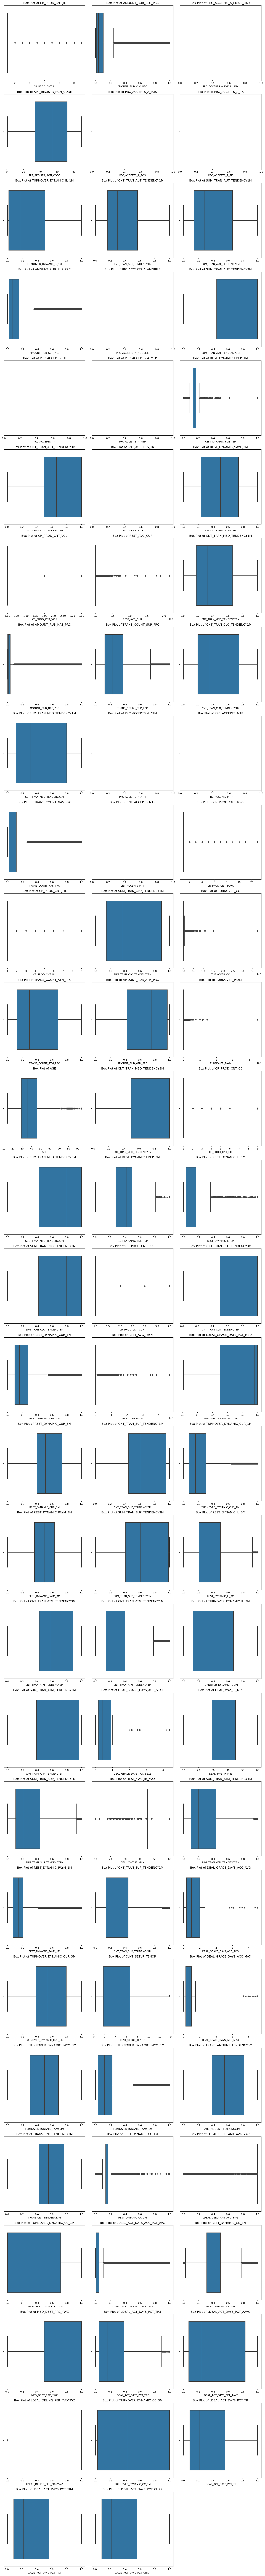

In [451]:
# Define the number of columns per row
num_columns = 3

# Calculate the number of rows needed
num_rows = (len(column_train) // num_columns) + (len(column_train) % num_columns > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Iterating over columns and plotting box plots
for i, col in enumerate(column_train):
    # Drop NaN values and filter out zeros
    data = x_train_cleaned[col].dropna()
    data = data[data != 0]
    
    sns.boxplot(x=data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

## Histogram of train data

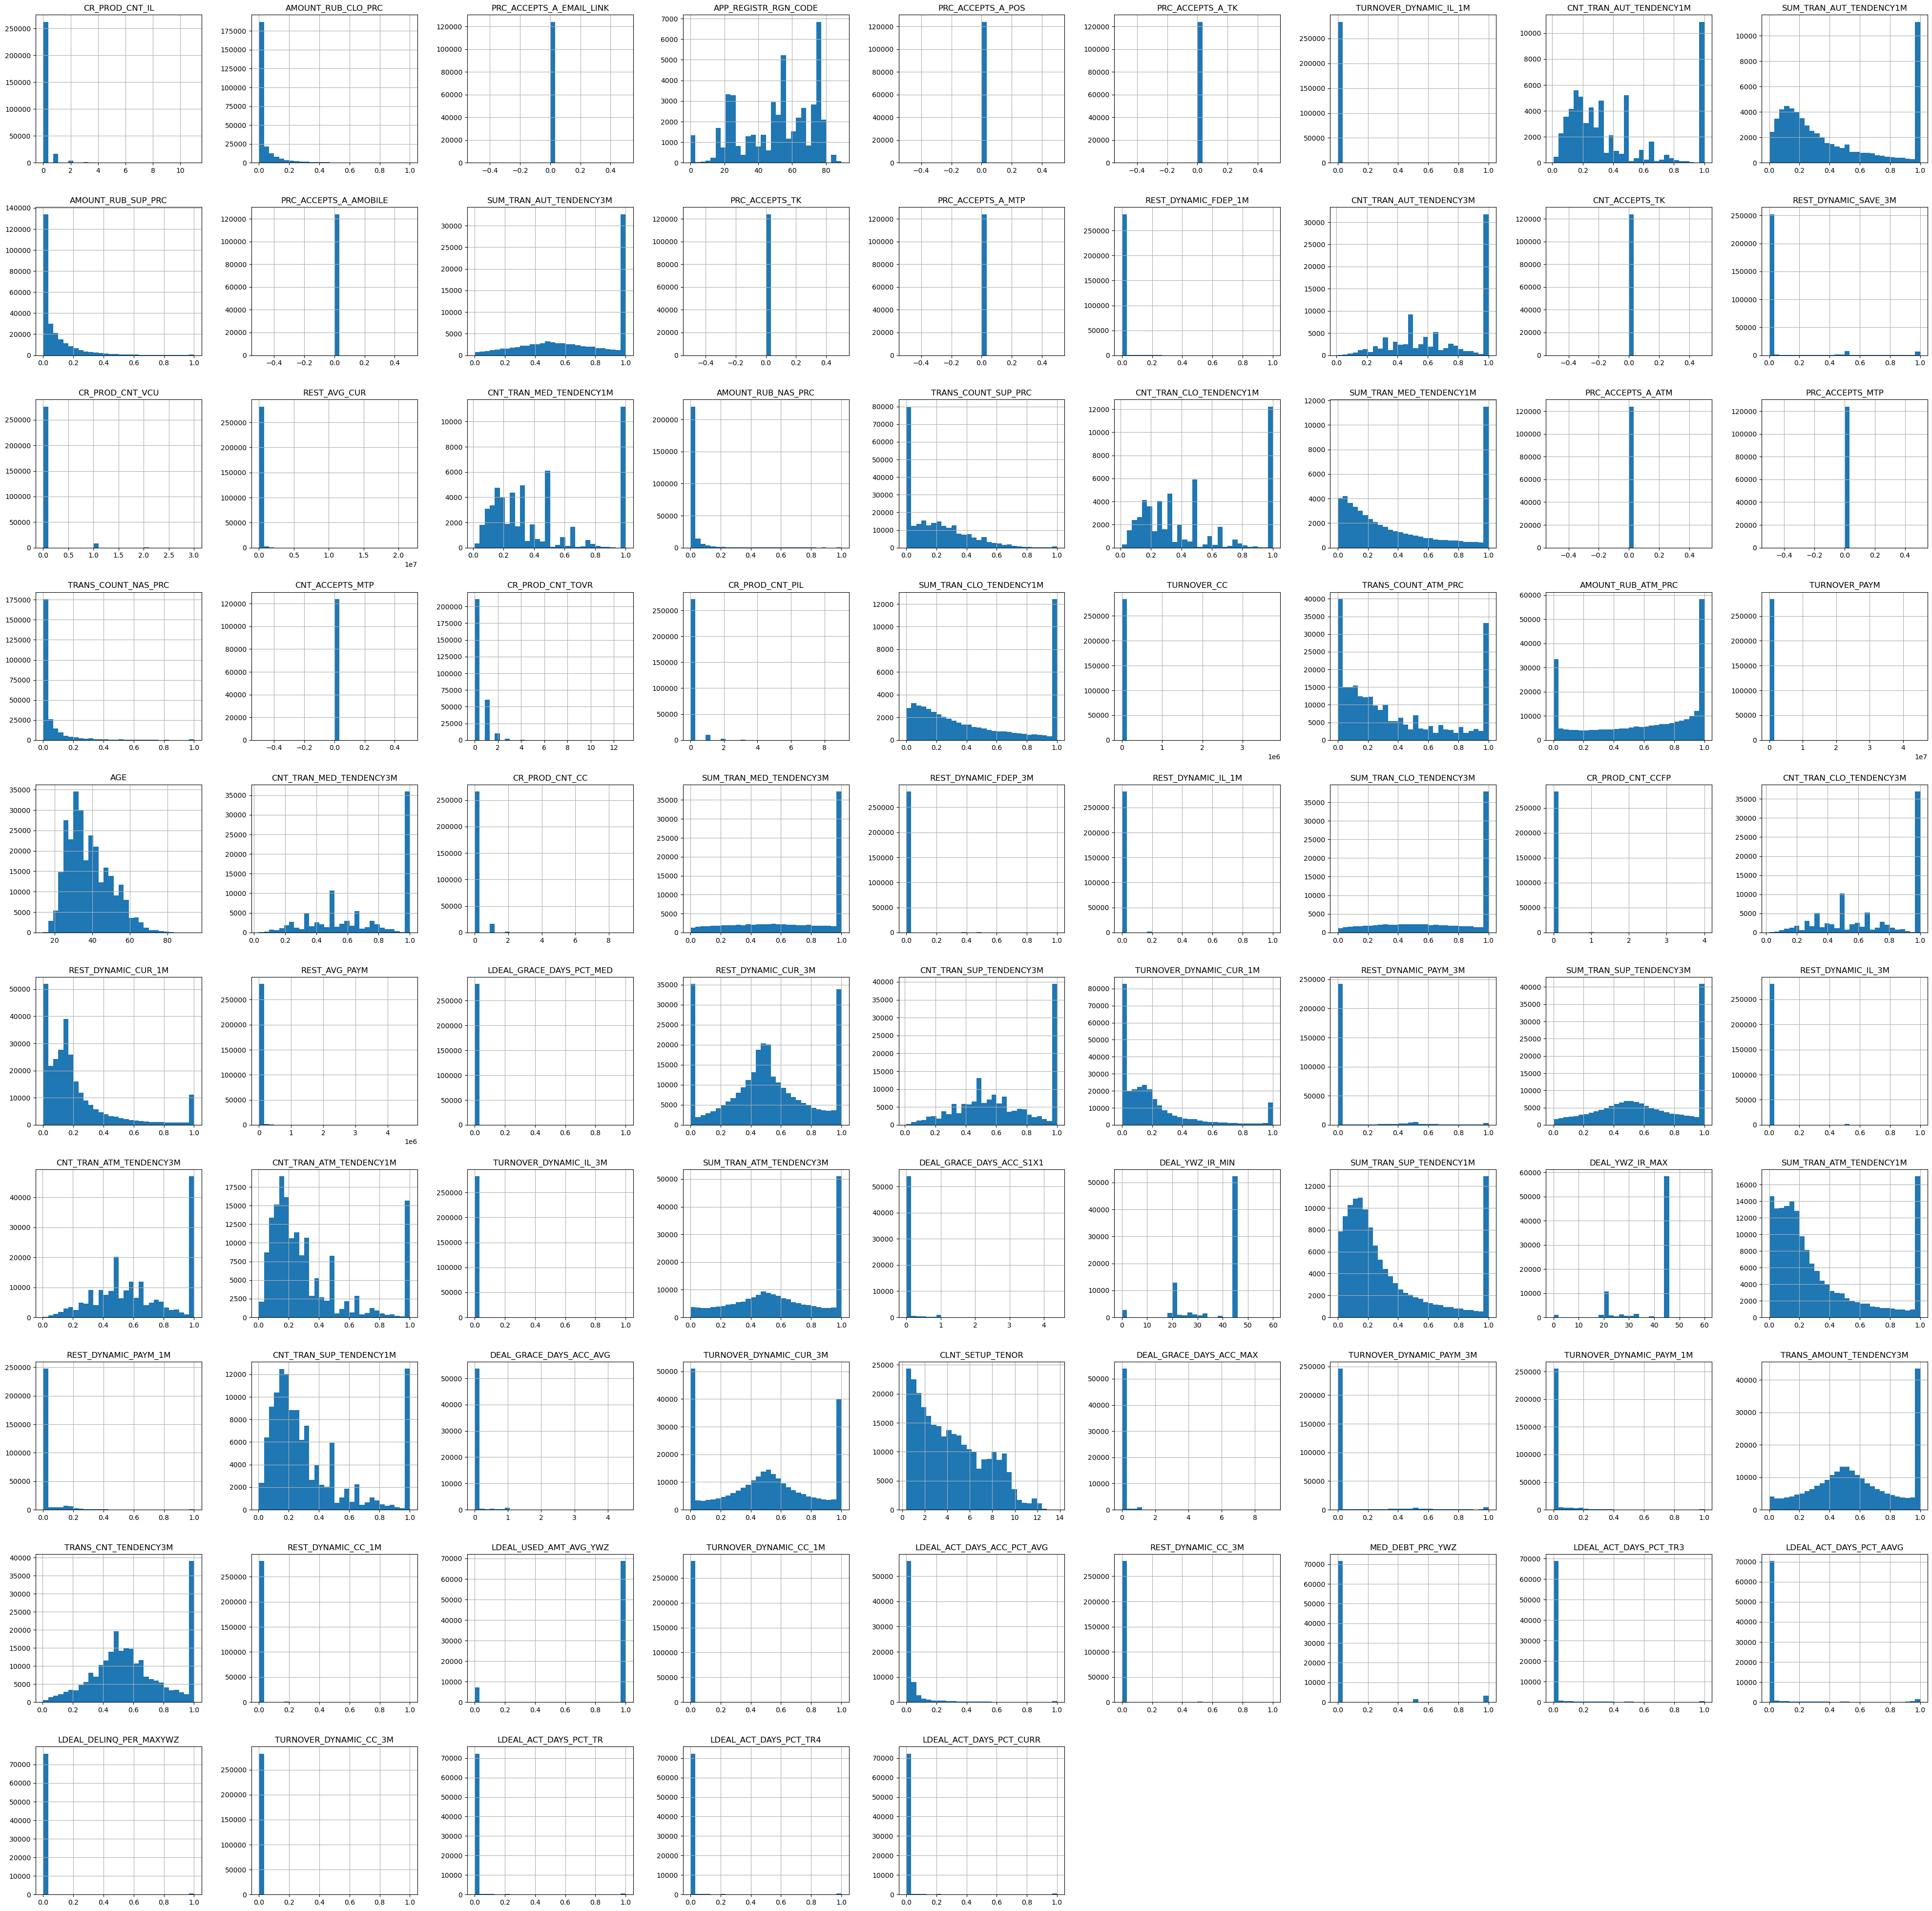

In [455]:
x_train_cleaned.hist(bins=30, figsize=(50, 50))
plt.show()

## Heatmap of train data

C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


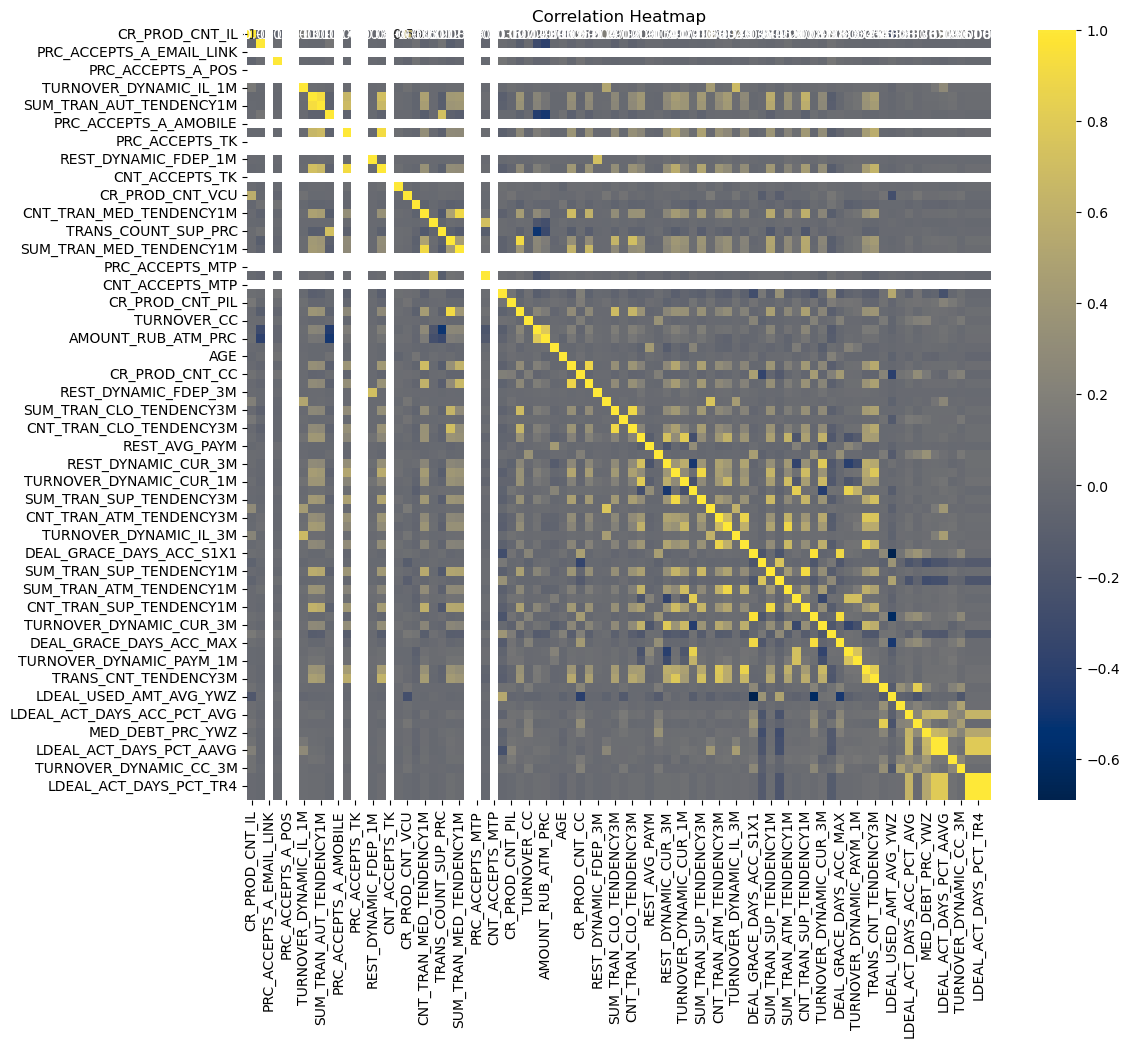

In [456]:
# Select only numeric columns
numeric_columns = x_train_cleaned.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap with a different colormap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')  # Use 'viridis' colormap
plt.title('Correlation Heatmap')
plt.show()

## Detecting outliers of test data

In [457]:
numeric_columns = x_test_cleaned.select_dtypes(include=['number'])
column_test = numeric_columns.columns
print(column_test)

Index(['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'PRC_ACCEPTS_A_EMAIL_LINK',
       'APP_REGISTR_RGN_CODE', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK',
       'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_RUB_SUP_PRC',
       'PRC_ACCEPTS_A_AMOBILE', 'SUM_TRAN_AUT_TENDENCY3M', 'PRC_ACCEPTS_TK',
       'PRC_ACCEPTS_A_MTP', 'REST_DYNAMIC_FDEP_1M', 'CNT_TRAN_AUT_TENDENCY3M',
       'CNT_ACCEPTS_TK', 'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU',
       'REST_AVG_CUR', 'CNT_TRAN_MED_TENDENCY1M', 'AMOUNT_RUB_NAS_PRC',
       'TRANS_COUNT_SUP_PRC', 'CNT_TRAN_CLO_TENDENCY1M',
       'SUM_TRAN_MED_TENDENCY1M', 'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_MTP',
       'TRANS_COUNT_NAS_PRC', 'CNT_ACCEPTS_MTP', 'CR_PROD_CNT_TOVR',
       'CR_PROD_CNT_PIL', 'SUM_TRAN_CLO_TENDENCY1M', 'TURNOVER_CC',
       'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM', 'AGE',
       'CNT_TRAN_MED_TENDENCY3M', 'CR_PROD_CNT_CC', 'SUM_TRAN_MED_TENDENCY3M',
       'REST_DYNAM

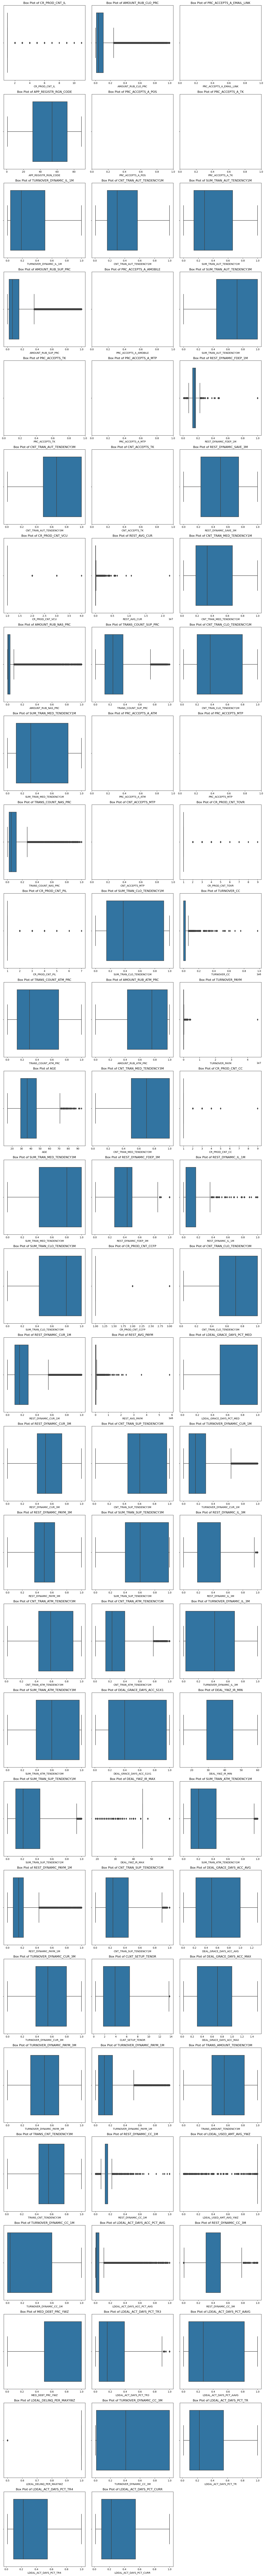

In [458]:
# Define the number of columns per row
num_columns = 3

# Calculate the number of rows needed
num_rows = (len(column_test) // num_columns) + (len(column_test) % num_columns > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Iterating over columns and plotting box plots
for i, col in enumerate(column_train):
    # Drop NaN values and filter out zeros
    data = x_test_cleaned[col].dropna()
    data = data[data != 0]
    
    sns.boxplot(x=data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

## Histogram of test data

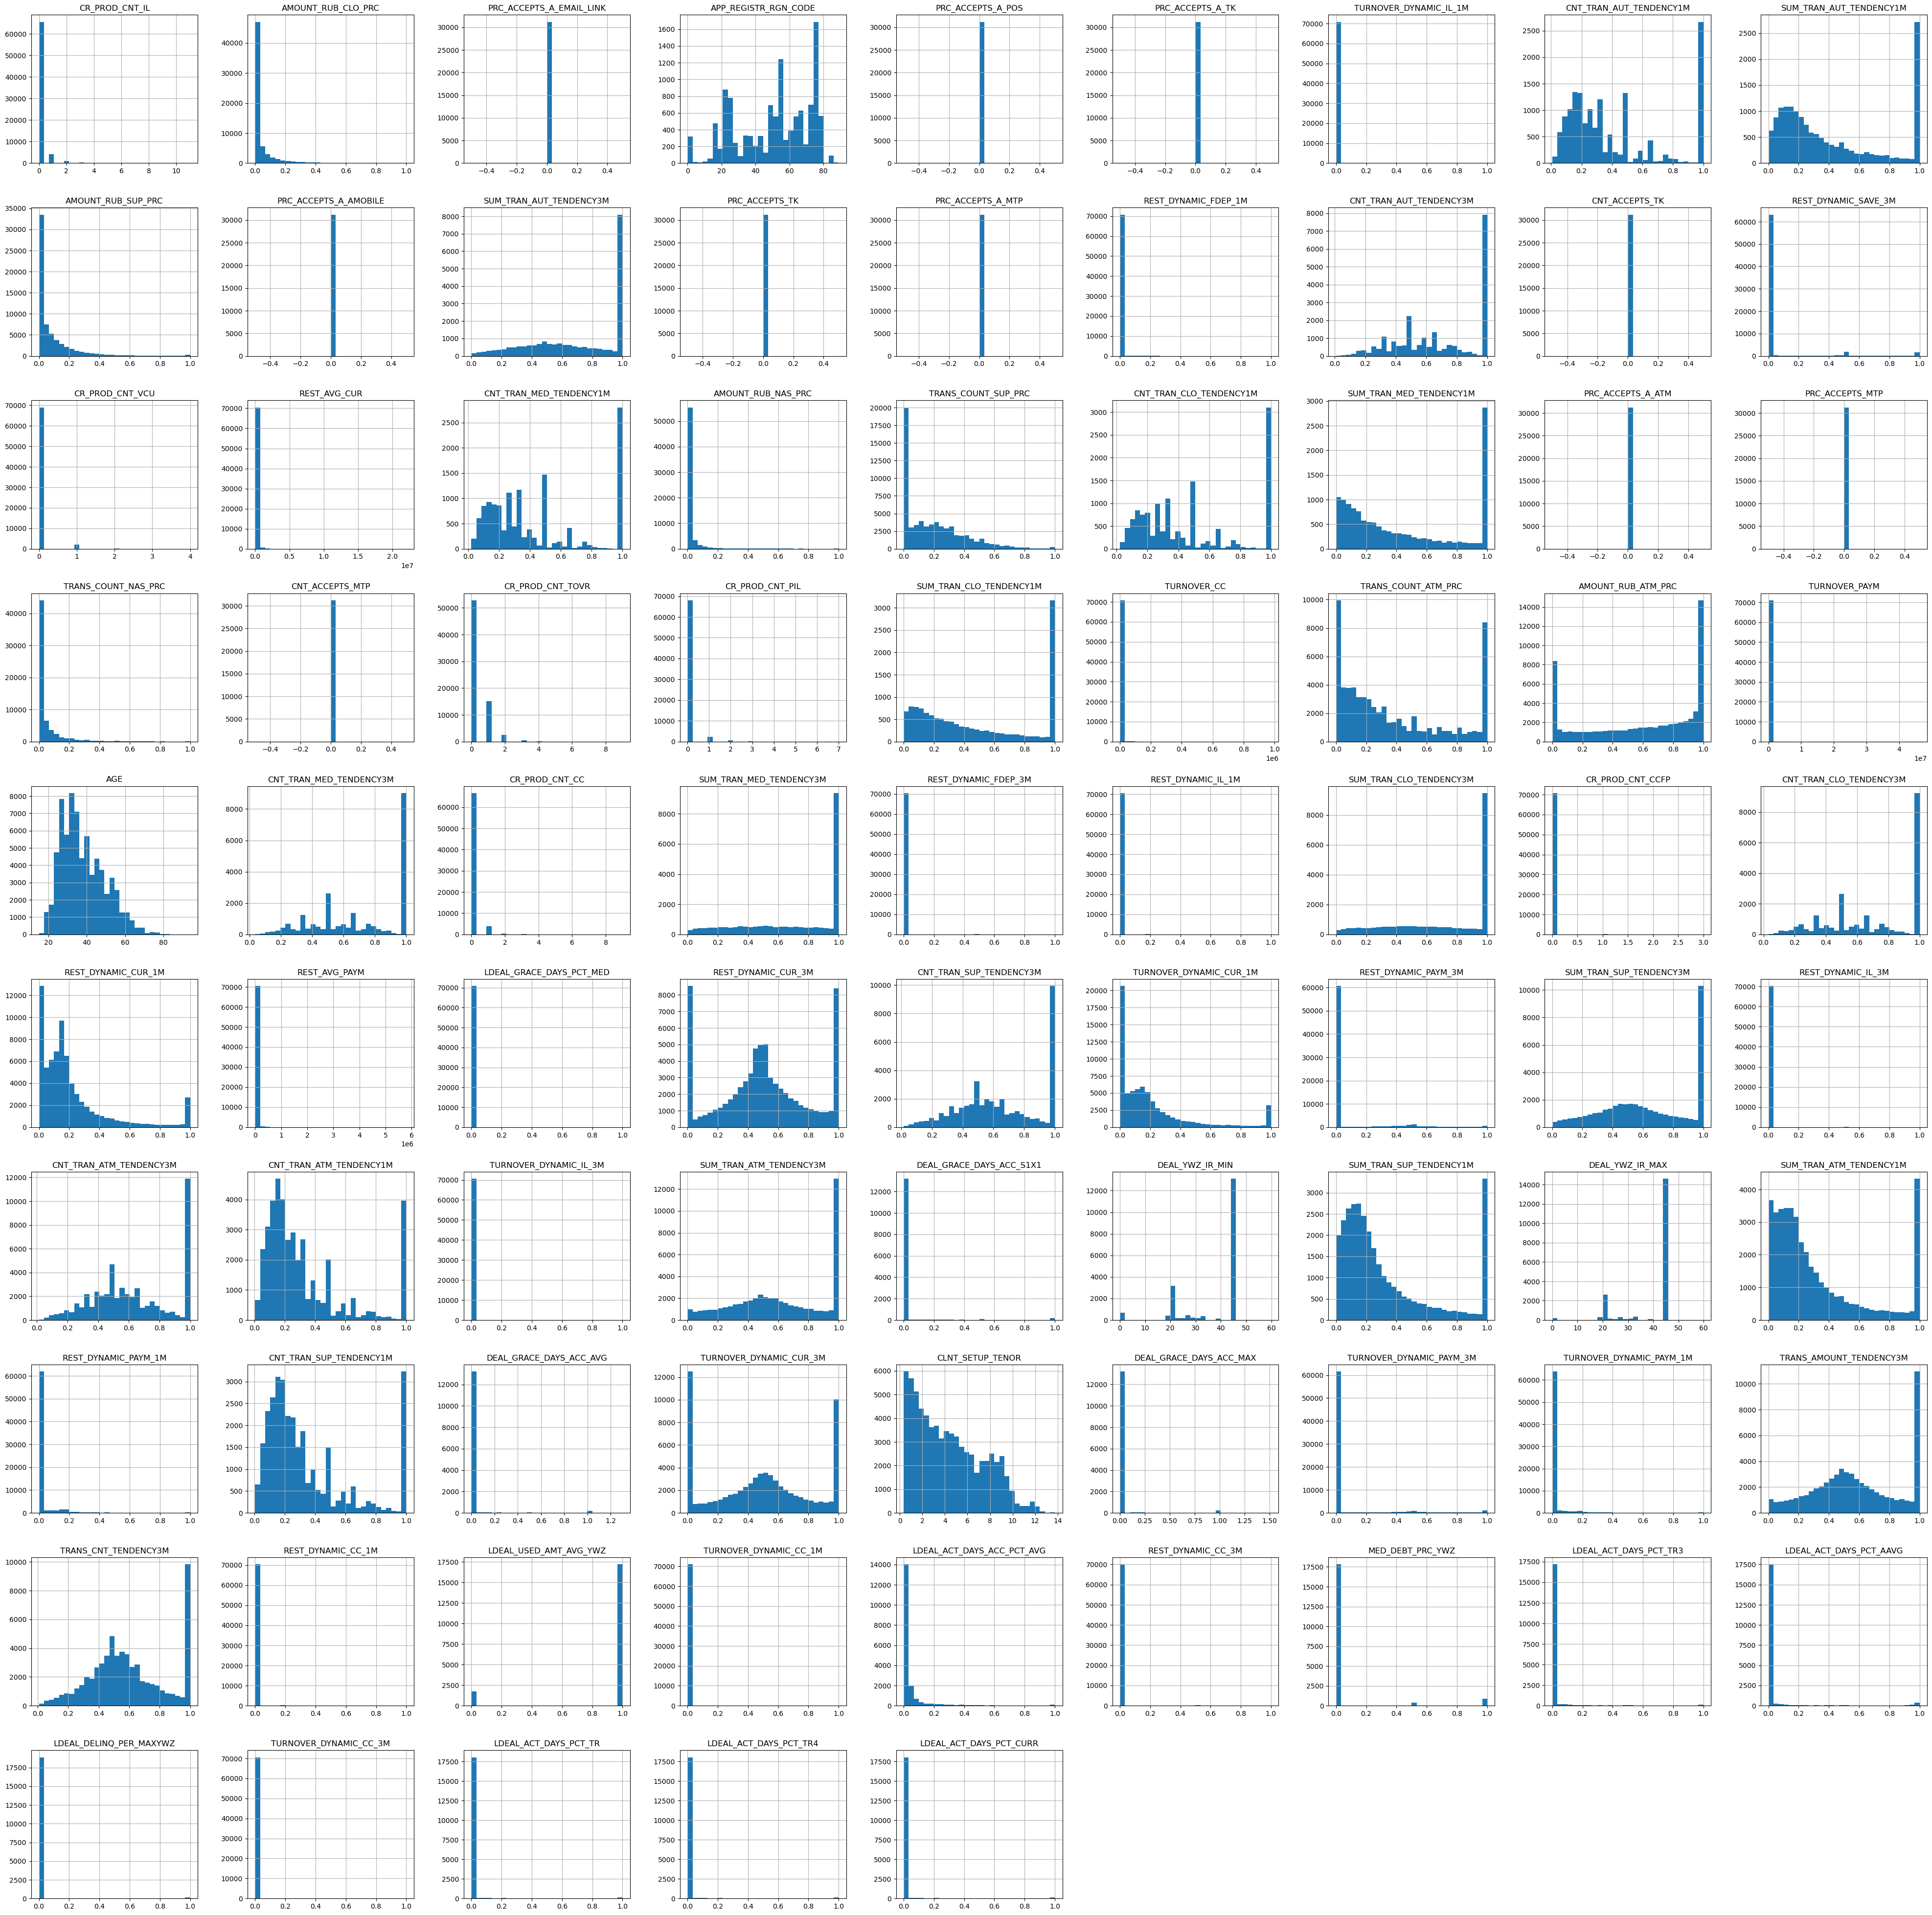

In [460]:
x_test_cleaned.hist(bins=30, figsize=(50, 50))
plt.show()

## Heatmap of test data

C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


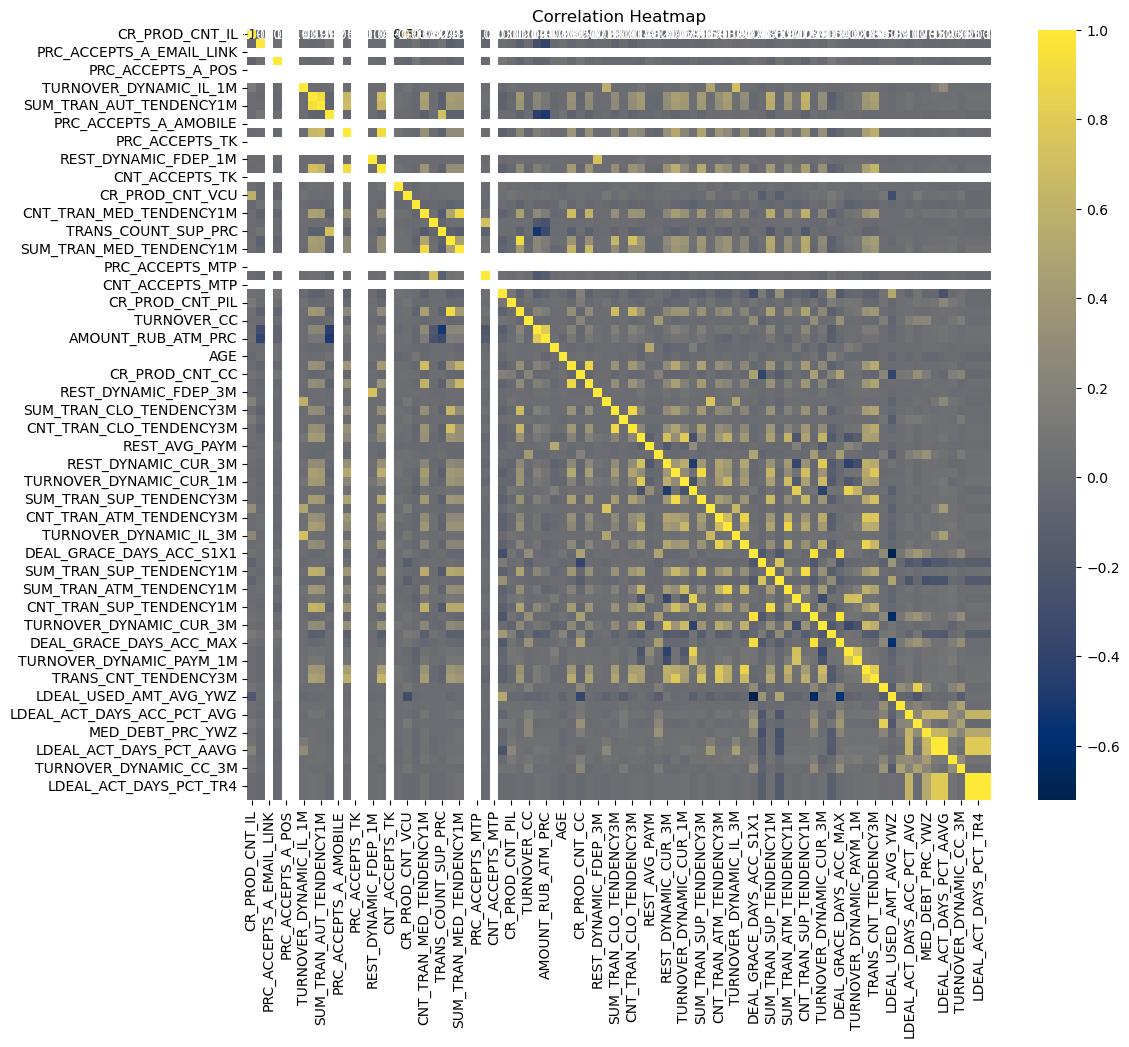

In [461]:
# Select only numeric columns
numeric_columns = x_test_cleaned.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap with a different colormap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')  # Use 'viridis' colormap
plt.title('Correlation Heatmap')
plt.show()

## Analyzing the imbalance between 0/1 in Train data and Balancing it

In [293]:
# Number of unique values in y
num_unique = y_train.nunique()
print(f'Number of unique values: {num_unique}')

# Count of each unique value y
value_counts = y_train.value_counts()
print('Counts of each unique value:')
print(value_counts)

Number of unique values: 2
Counts of each unique value:
TARGET
0    260979
1     23173
Name: count, dtype: int64


In [295]:
# Concatenating the features and target into one DataFrame
df3 = pd.concat([x_train_cleaned, y_train], axis=1)

# Separate majority and minority classes
majority = df3[df3['TARGET'] == 0]
minority = df3[df3['TARGET'] == 1]

# Assigning ratio for Majority and Minority classes
ratio = 2

# Calculating the number of samples to downsample to achieve the desired ratio
n_majority_samples = len(minority) * ratio

# Downsampling majority class to the desired ratio
majority_downsampled = resample(majority,
                                replace=False,  # Sample without replacement
                                n_samples=n_majority_samples,  # Adjusted number of samples
                                random_state=42)  # For reproducibility

# Combining minority class with downsampled majority class
df_downsampled = pd.concat([majority_downsampled, minority])

# Separating features and target
x_train_cleaned = df_downsampled.drop('TARGET', axis=1)
y_train = df_downsampled['TARGET']


In [297]:
x_train_cleaned.shape

(69519, 99)

In [299]:
y_train.shape

(69519,)

In [301]:
# Number of unique values after downlsampling
num_unique = y_train.nunique()
print(f'Number of unique values: {num_unique}')

# Count of each unique value  after downlsampling
value_counts = y_train.value_counts()
print('Counts of each unique value:')
print(value_counts)


Number of unique values: 2
Counts of each unique value:
TARGET
0    46346
1    23173
Name: count, dtype: int64


# Sampling the train and test datasets

In [303]:
#merging the train features and target together
train_merged = pd.concat([x_train_cleaned, y_train], axis=1)

# Sampling 5000 rows from the merged training DataFrame
train_sampled = train_merged.sample(n=5000, random_state=42)

# Splitting the sampled DataFrame back into x_train_cleaned and y_train
x_train_cleaned = train_sampled.drop(columns='TARGET')
y_train = train_sampled['TARGET']

# Printing shapes and head to verify
print("\nTrain Data:")
print(f"Sampled x_train_cleaned shape: {x_train_cleaned.shape}")
print(f"Sampled y_train shape: {y_train.shape}")


Train Data:
Sampled x_train_cleaned shape: (5000, 99)
Sampled y_train shape: (5000,)


In [305]:
#merging the test features and target together
test_merged = pd.concat([x_test_cleaned, y_test], axis=1)

# Sampling 1000 rows from the merged test DataFrame
test_sampled = test_merged.sample(n=1000, random_state=42)

# Splitting the sampled DataFrame back into x_test_cleaned and y_test
x_test_cleaned = test_sampled.drop(columns='TARGET')
y_test = test_sampled['TARGET']

# Printing shapes and head to verify
print("\nTest Data:")
print(f"Sampled x_test_cleaned shape: {x_test_cleaned.shape}")
print(f"Sampled y_test shape: {y_test.shape}")


Test Data:
Sampled x_test_cleaned shape: (1000, 99)
Sampled y_test shape: (1000,)


In [145]:
# Number of unique values in train data
num_unique = y_train.nunique()
print(f'Number of unique values: {num_unique}')

# Count of each unique value  in train data
value_counts = y_train.value_counts()
print('Counts of each unique value:')
print(value_counts)

Number of unique values: 2
Counts of each unique value:
TARGET
0    3267
1    1733
Name: count, dtype: int64


# Implementing Logistic Regression


In [309]:
# Defining the features
numeric_features = x_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train_cleaned.select_dtypes(include=['object']).columns

# Define preprocessing for numeric features: impute missing values with mean and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features for OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying OneHotEncoding on both training and test datasets
X_train_preprocessed = preprocessor.fit_transform(x_train_cleaned)
X_test_preprocessed = preprocessor.transform(x_test_cleaned)


In [321]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

start_time = time.time()

# Training the model
log_reg.fit(X_train_preprocessed, y_train)

LogisticRegression(max_iter=1000)

In [317]:
# Make predictions on the train and test data
y_train_pred = log_reg.predict(X_train_preprocessed)
y_train_pred_prob = log_reg.predict_proba(X_train_preprocessed)[:, 1]
y_test_pred = log_reg.predict(X_test_preprocessed)
y_test_pred_prob = log_reg.predict_proba(X_test_preprocessed)[:, 1]

# Calculating the metrics for train data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred_prob)
f3_train = fbeta_score(y_train, y_train_pred, beta=3)

# Calculating the metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred_prob)
f3_test = fbeta_score(y_test, y_test_pred, beta=3)

# Measuring the time taken for the model to predict the results
end_time = time.time()
elapsed_time = end_time - start_time

# Show the metrics
print(f"Time taken for training and evaluation: {elapsed_time:.2f} seconds")

print("Train Data Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print(f"F3 Score: {f3_train:.4f}")
print(f"AUC Score: {auc_train:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"F3 Score: {f3_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")

# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()

Time taken for training and evaluation: 63.72 seconds
Train Data Metrics:
Accuracy: 0.7546
Precision: 0.7196
Recall: 0.4784
F1 Score: 0.5747
F3 Score: 0.4950
AUC Score: 0.8155

Test Data Metrics:
Accuracy: 0.8120
Precision: 0.1636
Recall: 0.3506
F1 Score: 0.2231
F3 Score: 0.3147
AUC Score: 0.7219


In [315]:
# Print confusion matrices with TP, TN, FP, FN values individually
print("\nTrain Data Confusion Matrix:")
print(conf_matrix_train)
print(f"True Positive (TP): {TP_train}")
print(f"True Negative (TN): {TN_train}")
print(f"False Positive (FP): {FP_train}")
print(f"False Negative (FN): {FN_train}")

print("\nTest Data Confusion Matrix:")
print(conf_matrix_test)
print(f"True Positive (TP): {TP_test}")
print(f"True Negative (TN): {TN_test}")
print(f"False Positive (FP): {FP_test}")
print(f"False Negative (FN): {FN_test}")


Train Data Confusion Matrix:
[[2944  323]
 [ 904  829]]
True Positive (TP): 829
True Negative (TN): 2944
False Positive (FP): 323
False Negative (FN): 904

Test Data Confusion Matrix:
[[785 138]
 [ 50  27]]
True Positive (TP): 27
True Negative (TN): 785
False Positive (FP): 138
False Negative (FN): 50


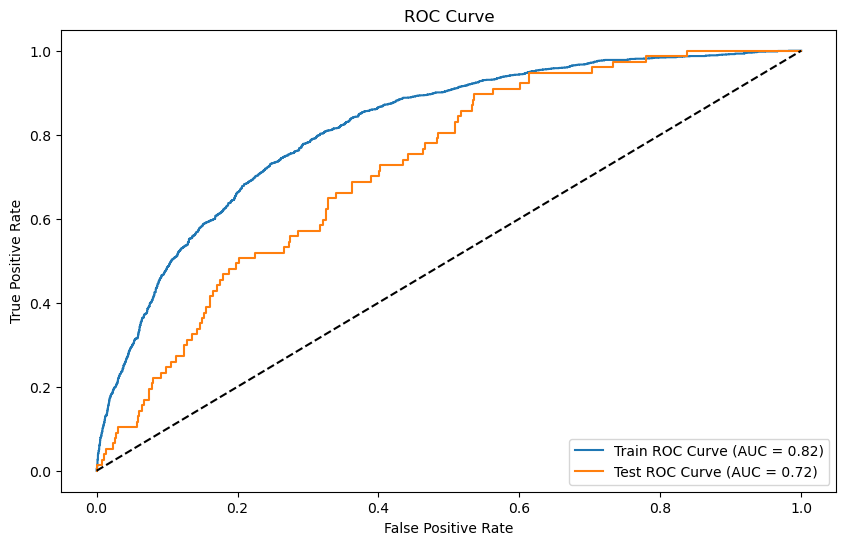

In [319]:
# Plot the ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


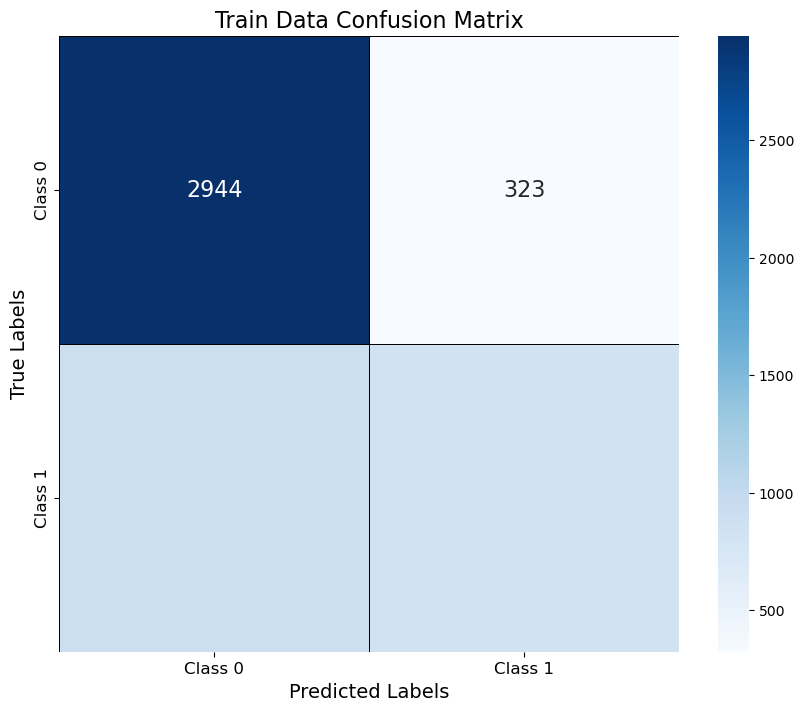

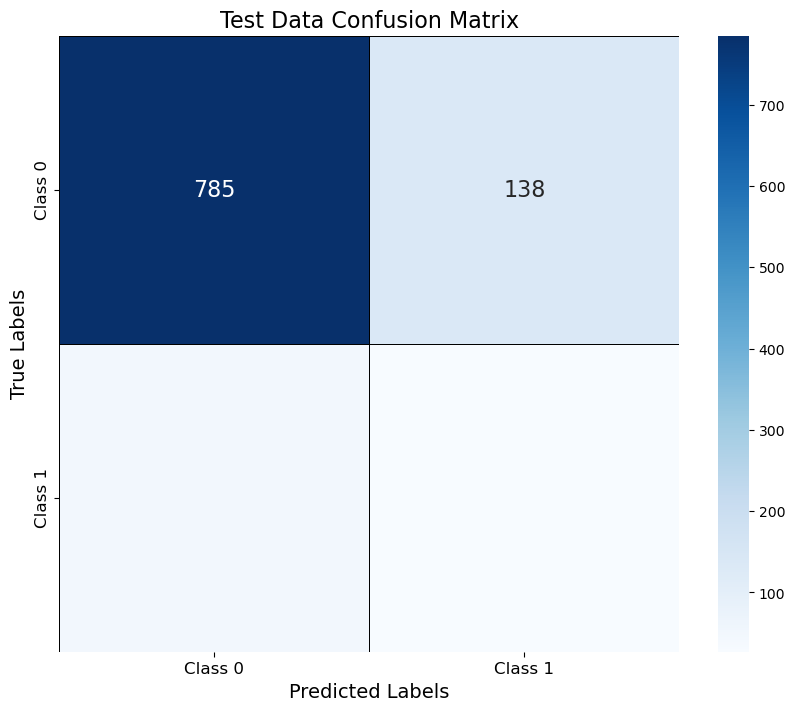

In [323]:
#Plotting the confusion matrices
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))  # Increase figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 16},  # Increase font size of annotations
                linewidths=0.5, linecolor='black')  # Add lines around cells
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Define class labels (adjust as needed)
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix for train data
plot_confusion_matrix(conf_matrix_train, class_labels, 'Train Data Confusion Matrix')

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, class_labels, 'Test Data Confusion Matrix')


# 10-Fold CV

In [325]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10)

# Get cross-validated predictions for the training data
y_train_pred_cv = cross_val_predict(log_reg, X_train_preprocessed, y_train, cv=cv)
y_train_pred_prob_cv = cross_val_predict(log_reg, X_train_preprocessed, y_train, cv=cv, method='predict_proba')[:, 1]

# Training the model on the entire training dataset
log_reg.fit(X_train_preprocessed, y_train)

# Get predictions for the test data
y_test_pred = log_reg.predict(X_test_preprocessed)
y_test_pred_prob = log_reg.predict_proba(X_test_preprocessed)[:, 1]

# Calculating the metrics for cross-validated train data
accuracy_train_cv = accuracy_score(y_train, y_train_pred_cv)
precision_train_cv = precision_score(y_train, y_train_pred_cv)
recall_train_cv = recall_score(y_train, y_train_pred_cv)
f1_train_cv = f1_score(y_train, y_train_pred_cv)
auc_train_cv = roc_auc_score(y_train, y_train_pred_prob_cv)
f3_train_cv = fbeta_score(y_train, y_train_pred_cv, beta=3)

# Calculating the metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred_prob)
f3_test = fbeta_score(y_test, y_test_pred, beta=3)

# Show the metrics
print("Cross-Validated Train Data Metrics:")
print(f"Accuracy: {accuracy_train_cv:.4f}")
print(f"Precision: {precision_train_cv:.4f}")
print(f"Recall: {recall_train_cv:.4f}")
print(f"F1 Score: {f1_train_cv:.4f}")
print(f"F3 Score: {f3_train_cv:.4f}")
print(f"AUC Score: {auc_train_cv:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"F3 Score: {f3_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")



Cross-Validated Train Data Metrics:
Accuracy: 0.6884
Precision: 0.5793
Recall: 0.3687
F1 Score: 0.4506
F3 Score: 0.3826
AUC Score: 0.7187

Test Data Metrics:
Accuracy: 0.8120
Precision: 0.1636
Recall: 0.3506
F1 Score: 0.2231
F3 Score: 0.3147
AUC Score: 0.7219


In [339]:
# Calculate confusion matrix for cross-validated training data
confusion_train_cv = confusion_matrix(y_train, y_train_pred_cv)
print("\nConfusion Matrix for Cross-Validated Train Data:")
print(confusion_train_cv)

# Calculate confusion matrix for test data
confusion_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:")
print(confusion_test)



Confusion Matrix for Cross-Validated Train Data:
[[2803  464]
 [1094  639]]

Confusion Matrix for Test Data:
[[785 138]
 [ 50  27]]


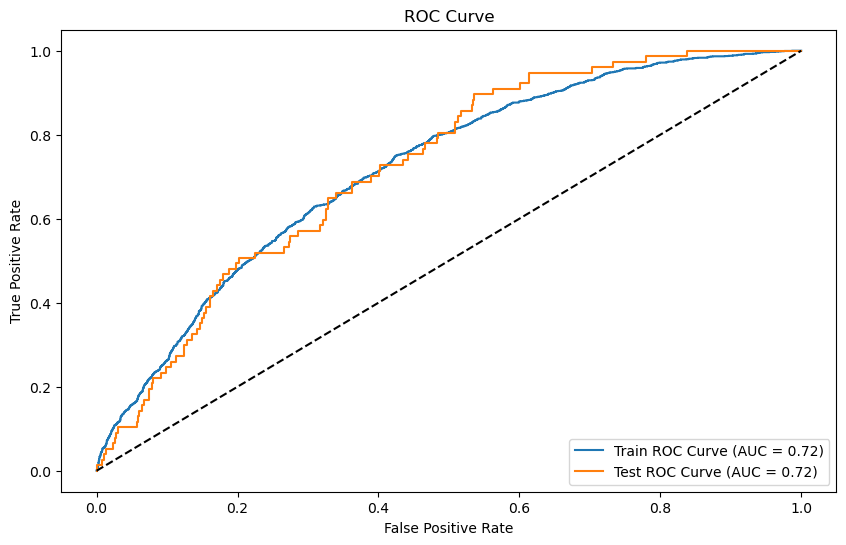

In [329]:
# Plot the ROC curves
fpr_train_cv, tpr_train_cv, _ = roc_curve(y_train, y_train_pred_prob_cv)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_cv, tpr_train_cv, label='Train ROC Curve (AUC = %0.2f)' % auc_train_cv)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


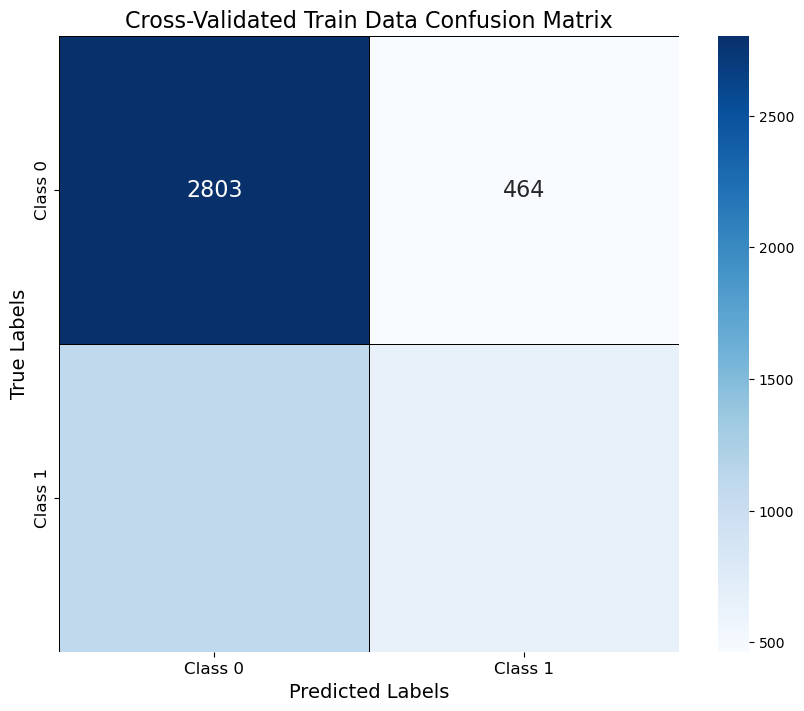

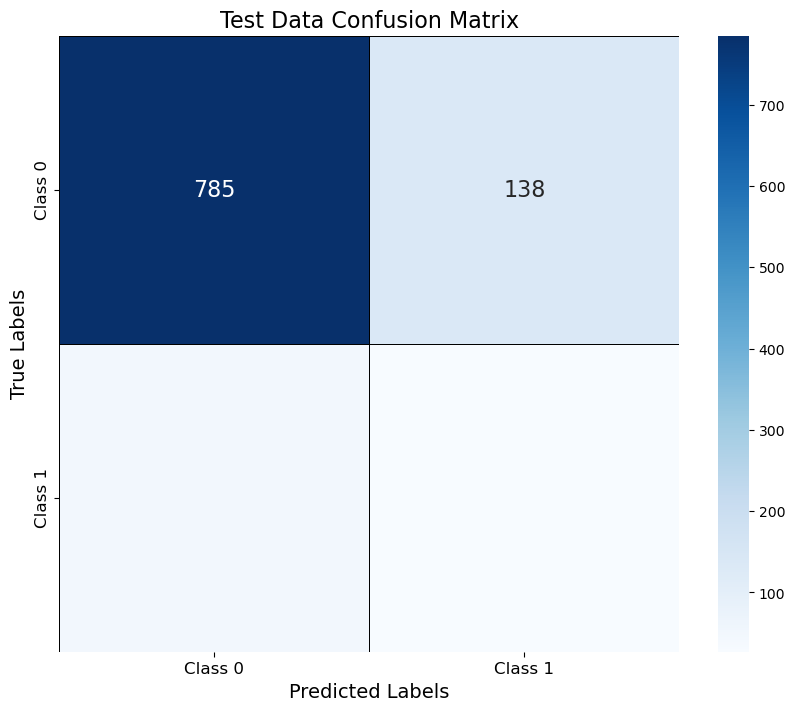

In [341]:

# Plot confusion matrices
class_labels = ['Class 0', 'Class 1']
plot_confusion_matrix(conf_matrix_train_cv, class_labels, 'Cross-Validated Train Data Confusion Matrix')
plot_confusion_matrix(conf_matrix_test, class_labels, 'Test Data Confusion Matrix')


## Grid Search CV

In [369]:
grid_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42, tol=1e-6, max_iter=1000), grid_param, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV on PCA-transformed SMOTE data
grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

# Get predictions for test data
y_best_pred = best_model.predict(X_test_preprocessed)

# Print classification report for test data
print(classification_report(y_test, y_best_pred))

# ROC AUC score for test data
print("ROC AUC Score for Best Model:", roc_auc_score(y_test, best_model.predict_proba(X_test_preprocessed)[:, 1]))

# Get predictions for training data
y_train_pred = best_model.predict(X_train_preprocessed)

# Print confusion matrix for training data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_best_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       923
           1       0.21      0.34      0.26        77

    accuracy                           0.85      1000
   macro avg       0.58      0.62      0.59      1000
weighted avg       0.89      0.85      0.87      1000

ROC AUC Score for Best Model: 0.7406818533579097
Confusion Matrix for Training Data:
[[2934  333]
 [1147  586]]
Confusion Matrix for Test Data:
[[825  98]
 [ 51  26]]


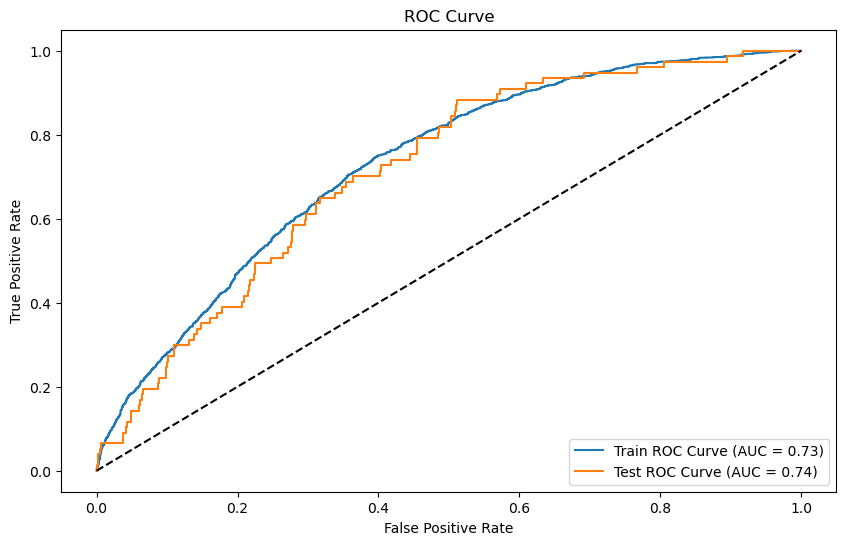

In [371]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Combining Grid Search CV and 10 Fold CV

In [373]:
# Define the hyperparameters grid to search
grid_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, tol=1e-6, max_iter=1000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid_param, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_preprocessed, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Print the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get cross-validated predictions for the training data
cv = StratifiedKFold(n_splits=10)
y_train_pred_cv = cross_val_predict(best_model, X_train_preprocessed, y_train, cv=cv)
y_train_pred_prob_cv = cross_val_predict(best_model, X_train_preprocessed, y_train, cv=cv, method='predict_proba')[:, 1]

# Get predictions for the test data
y_test_pred = best_model.predict(X_test_preprocessed)
y_test_pred_prob = best_model.predict_proba(X_test_preprocessed)[:, 1]

# Calculating the metrics for cross-validated train data
accuracy_train_cv = accuracy_score(y_train, y_train_pred_cv)
precision_train_cv = precision_score(y_train, y_train_pred_cv)
recall_train_cv = recall_score(y_train, y_train_pred_cv)
f1_train_cv = f1_score(y_train, y_train_pred_cv)
auc_train_cv = roc_auc_score(y_train, y_train_pred_prob_cv)
f3_train_cv = fbeta_score(y_train, y_train_pred_cv, beta=3)

# Calculating the metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred_prob)
f3_test = fbeta_score(y_test, y_test_pred, beta=3)

# Show the metrics
print("Cross-Validated Train Data Metrics:")
print(f"Accuracy: {accuracy_train_cv:.4f}")
print(f"Precision: {precision_train_cv:.4f}")
print(f"Recall: {recall_train_cv:.4f}")
print(f"F1 Score: {f1_train_cv:.4f}")
print(f"F3 Score: {f3_train_cv:.4f}")
print(f"AUC Score: {auc_train_cv:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"F3 Score: {f3_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Cross-Validated Train Data Metrics:
Accuracy: 0.6950
Precision: 0.6133
Recall: 0.3249
F1 Score: 0.4247
F3 Score: 0.3409
AUC Score: 0.7331

Test Data Metrics:
Accuracy: 0.8510
Precision: 0.2097
Recall: 0.3377
F1 Score: 0.2587
F3 Score: 0.3182
AUC Score: 0.7407


In [375]:
# Calculate confusion matrices
conf_matrix_train_cv = confusion_matrix(y_train, y_train_pred_cv)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate confusion matrix values
TN_train_cv, FP_train_cv, FN_train_cv, TP_train_cv = conf_matrix_train_cv.ravel()
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()

# Print confusion matrices with TP, TN, FP, FN values individually
print("\nCross-Validated Train Data Confusion Matrix:")
print(conf_matrix_train_cv)
print(f"True Positive (TP): {TP_train_cv}")
print(f"True Negative (TN): {TN_train_cv}")
print(f"False Positive (FP): {FP_train_cv}")
print(f"False Negative (FN): {FN_train_cv}")

print("\nTest Data Confusion Matrix:")
print(conf_matrix_test)
print(f"True Positive (TP): {TP_test}")
print(f"True Negative (TN): {TN_test}")
print(f"False Positive (FP): {FP_test}")
print(f"False Negative (FN): {FN_test}")




Cross-Validated Train Data Confusion Matrix:
[[2912  355]
 [1170  563]]
True Positive (TP): 563
True Negative (TN): 2912
False Positive (FP): 355
False Negative (FN): 1170

Test Data Confusion Matrix:
[[825  98]
 [ 51  26]]
True Positive (TP): 26
True Negative (TN): 825
False Positive (FP): 98
False Negative (FN): 51


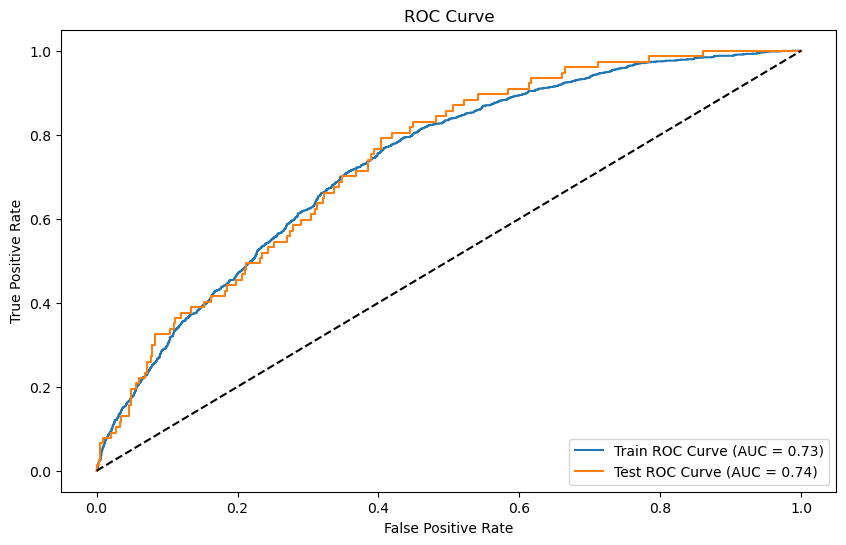

In [381]:
# Plot the ROC curves
fpr_train_cv, tpr_train_cv, _ = roc_curve(y_train, y_train_pred_prob_cv)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_cv, tpr_train_cv, label='Train ROC Curve (AUC = %0.2f)' % auc_train_cv)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 16},
                linewidths=0.5, linecolor='black')
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()



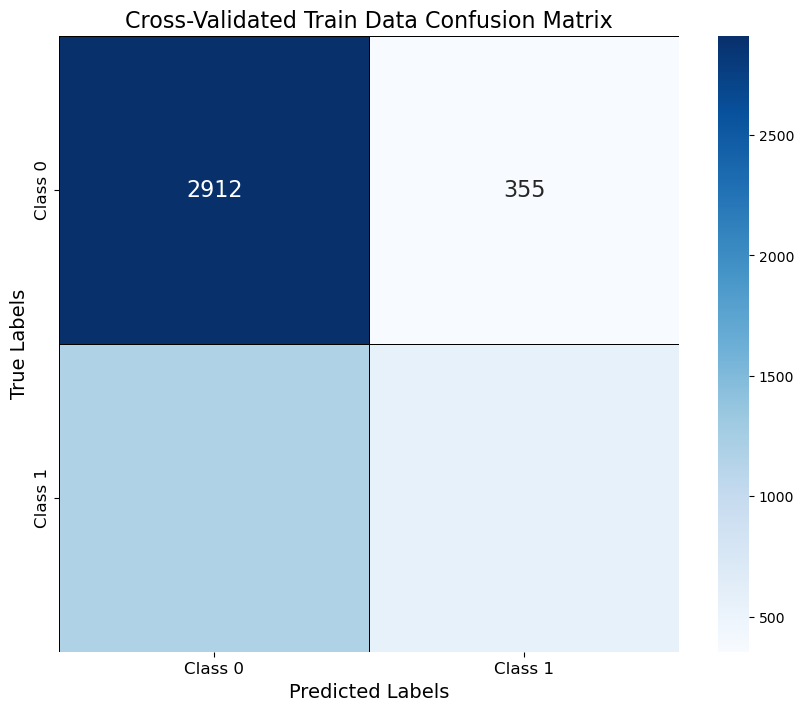

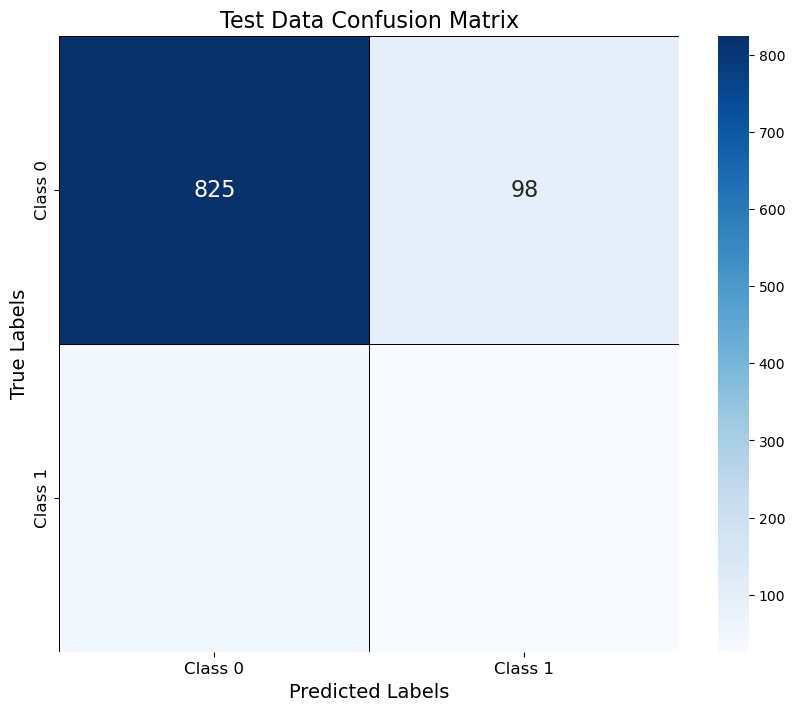

In [379]:
# Define class labels (adjust as needed)
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix for train data
plot_confusion_matrix(conf_matrix_train_cv, class_labels, 'Cross-Validated Train Data Confusion Matrix')

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, class_labels, 'Test Data Confusion Matrix')


# Sensitivity Analysis

In [383]:

def sensitivity_analysis(model, X, feature_names):
    # Convert sparse matrix to dense format for processing
    if sp.issparse(X):
        X = X.toarray()
    
    base_pred = model.predict_proba(X)[:, 1]
    sensitivity = {}
    
    for i, feature in enumerate(feature_names):
        X_temp = X.copy()
        X_temp[:, i] += 0.01  # Adding a small change to the feature
        new_pred = model.predict_proba(X_temp)[:, 1]
        sensitivity[feature] = np.mean(np.abs(new_pred - base_pred))
    
    return sensitivity

# Assuming `numeric_features` is a list of numerical feature names
feature_names = numeric_features  # Use only numerical features here
sensitivity = sensitivity_analysis(best_model, X_test_preprocessed, feature_names)

# Sort sensitivity scores
sorted_sensitivity = sorted(sensitivity.items(), key=lambda x: x[1])

# Print sensitivity analysis results for numerical features
print("\nSensitivity Analysis (Numerical Features Only):")
for feature, score in sorted_sensitivity:
    print(f"{feature}: {score:.6f}")



Sensitivity Analysis (Numerical Features Only):
PRC_ACCEPTS_A_EMAIL_LINK: 0.000000
APP_REGISTR_RGN_CODE: 0.000000
PRC_ACCEPTS_A_POS: 0.000000
PRC_ACCEPTS_A_TK: 0.000000
CNT_TRAN_AUT_TENDENCY1M: 0.000000
AMOUNT_RUB_SUP_PRC: 0.000000
PRC_ACCEPTS_A_AMOBILE: 0.000000
SUM_TRAN_AUT_TENDENCY3M: 0.000000
PRC_ACCEPTS_TK: 0.000000
PRC_ACCEPTS_A_MTP: 0.000000
CNT_TRAN_AUT_TENDENCY3M: 0.000000
CNT_ACCEPTS_TK: 0.000000
CNT_TRAN_CLO_TENDENCY1M: 0.000000
SUM_TRAN_MED_TENDENCY1M: 0.000000
PRC_ACCEPTS_A_ATM: 0.000000
PRC_ACCEPTS_MTP: 0.000000
CNT_ACCEPTS_MTP: 0.000000
TURNOVER_CC: 0.000000
AMOUNT_RUB_ATM_PRC: 0.000000
SUM_TRAN_MED_TENDENCY3M: 0.000000
SUM_TRAN_CLO_TENDENCY3M: 0.000000
LDEAL_GRACE_DAYS_PCT_MED: 0.000000
SUM_TRAN_SUP_TENDENCY3M: 0.000000
CNT_TRAN_ATM_TENDENCY1M: 0.000000
TURNOVER_DYNAMIC_IL_3M: 0.000000
SUM_TRAN_ATM_TENDENCY3M: 0.000000
DEAL_YWZ_IR_MIN: 0.000000
SUM_TRAN_SUP_TENDENCY1M: 0.000000
DEAL_YWZ_IR_MAX: 0.000000
DEAL_GRACE_DAYS_ACC_AVG: 0.000000
TRANS_AMOUNT_TENDENCY3M: 0.00000

## Tuning Logistic Regression with the Sensitivity scores

In [387]:
# Normalizing the sensitivity scores
sensitivity_scores = np.array([score for feature, score in sorted_sensitivity])
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(sensitivity_scores.reshape(-1, 1)).flatten()

# Create a dictionary to map feature names to their normalized sensitivity scores
sensitivity_dict = {feature: normalized_scores[i] for i, (feature, score) in enumerate(sorted_sensitivity)}

# Function to scale features based on their sensitivity scores
def scale_features(X, sensitivity_dict, feature_names):
    X_scaled = X.copy()
    for i, feature in enumerate(feature_names):
        X_scaled[:, i] *= sensitivity_dict[feature]
    return X_scaled

# Convert sparse matrix to dense format if needed
if issparse(X_train_preprocessed):
    X_train_preprocessed = X_train_preprocessed.toarray()

# Extract numerical features
X_train_numerical = X_train_preprocessed[:, :len(numeric_features)]
X_test_numerical = X_test_preprocessed[:, :len(numeric_features)]

# Scale numerical features based on sensitivity scores
X_train_numerical_scaled = scale_features(X_train_numerical, sensitivity_dict, numeric_features)

# Combine scaled numerical features with the rest of the dataset (categorical features)
X_train_scaled = np.hstack((X_train_numerical_scaled, X_train_preprocessed[:, len(numeric_features):]))

# Use the original (unscaled) test data for predictions
X_test_scaled = X_test_preprocessed  # No scaling applied here

# Initialize the logistic regression model with the best parameters
best_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], random_state=42, max_iter = 1000)

# Fit the logistic regression model on the scaled training features
best_model.fit(X_train_scaled, y_train)

# Make predictions on the original test data
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# ROC AUC score for train data
print("ROC AUC Score for Best Model (Train Data):", roc_auc_score(y_train, best_model.predict_proba(X_train_scaled)[:, 1]))

# ROC AUC score for test data
print("ROC AUC Score for Best Model (Test Data):", roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]))


ROC AUC Score for Best Model (Train Data): 0.7298092396450473
ROC AUC Score for Best Model (Test Data): 0.7079399473765671


In [389]:
# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))

# Print confusion matrix for train data
print("Confusion Matrix for Train Data:")
print(confusion_matrix(y_train, y_train_pred))

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79      3267
           1       0.63      0.24      0.35      1733

    accuracy                           0.69      5000
   macro avg       0.66      0.58      0.57      5000
weighted avg       0.67      0.69      0.64      5000

Confusion Matrix for Train Data:
[[3016  251]
 [1312  421]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       923
           1       0.14      0.56      0.23        77

    accuracy                           0.71      1000
   macro avg       0.55      0.64      0.52      1000
weighted avg       0.89      0.71      0.77      1000

Confusion Matrix for Test Data:
[[663 260]
 [ 34  43]]


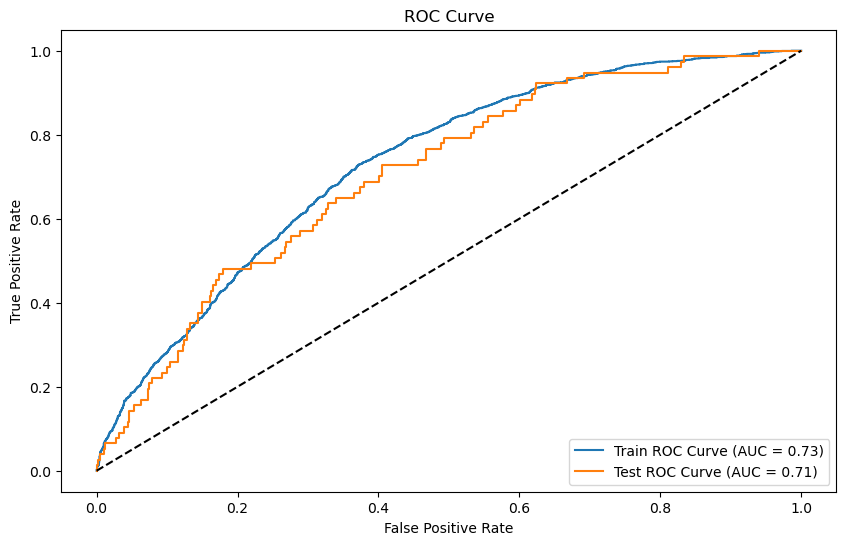

In [391]:
# Calculate ROC curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, best_model.predict_proba(X_train_scaled)[:, 1])
auc_train = roc_auc_score(y_train, best_model.predict_proba(X_train_scaled)[:, 1])

# Calculate ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Running SVM

In [393]:
# Define the features
numeric_features = x_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train_cleaned.select_dtypes(include=['object']).columns

# Define preprocessing for numeric features: impute missing values with mean and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features for OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to both training and test datasets
X_train_preprocessed = preprocessor.fit_transform(x_train_cleaned)
X_test_preprocessed = preprocessor.transform(x_test_cleaned)


In [395]:
# Initialize the SVM model
svm = SVC(probability=True, max_iter=5000)

# Measure start time
start_time = time.time()

# Train the model
svm.fit(X_train_preprocessed, y_train)

# Measure end time
end_time = time.time()
elapsed_time = end_time - start_time

# Make predictions on the train and test data
y_train_pred_svm = svm.predict(X_train_preprocessed)
y_train_pred_prob_svm = svm.predict_proba(X_train_preprocessed)[:, 1]
y_test_pred_svm = svm.predict(X_test_preprocessed)
y_test_pred_prob_svm = svm.predict_proba(X_test_preprocessed)[:, 1]

# Calculating the metrics for train data
accuracy_train = accuracy_score(y_train, y_train_pred_svm)
precision_train = precision_score(y_train, y_train_pred_svm)
recall_train = recall_score(y_train, y_train_pred_svm)
f1_train = f1_score(y_train, y_train_pred_svm)
auc_train = roc_auc_score(y_train, y_train_pred_prob_svm)
f3_train = fbeta_score(y_train, y_train_pred_svm, beta=3)

# Calculating the metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred_svm)
precision_test = precision_score(y_test, y_test_pred_svm)
recall_test = recall_score(y_test, y_test_pred_svm)
f1_test = f1_score(y_test, y_test_pred_svm)
auc_test = roc_auc_score(y_test, y_test_pred_prob_svm)
f3_test = fbeta_score(y_test, y_test_pred_svm, beta=3)

# Show the metrics
print(f"Time taken for training and evaluation: {elapsed_time:.2f} seconds")

print("Train Data Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print(f"F3 Score: {f3_train:.4f}")
print(f"AUC Score: {auc_train:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"F3 Score: {f3_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")



Time taken for training and evaluation: 19.64 seconds
Train Data Metrics:
Accuracy: 0.7644
Precision: 0.8094
Recall: 0.4189
F1 Score: 0.5521
F3 Score: 0.4402
AUC Score: 0.8632

Test Data Metrics:
Accuracy: 0.8730
Precision: 0.2340
Recall: 0.2857
F1 Score: 0.2573
F3 Score: 0.2795
AUC Score: 0.7708


In [397]:
# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred_svm)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_svm)

TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()

# Print confusion matrices with TP, TN, FP, FN values individually
print("\nTrain Data Confusion Matrix:")
print(conf_matrix_train)
print(f"True Positive (TP): {TP_train}")
print(f"True Negative (TN): {TN_train}")
print(f"False Positive (FP): {FP_train}")
print(f"False Negative (FN): {FN_train}")

print("\nTest Data Confusion Matrix:")
print(conf_matrix_test)
print(f"True Positive (TP): {TP_test}")
print(f"True Negative (TN): {TN_test}")
print(f"False Positive (FP): {FP_test}")
print(f"False Negative (FN): {FN_test}")



Train Data Confusion Matrix:
[[3096  171]
 [1007  726]]
True Positive (TP): 726
True Negative (TN): 3096
False Positive (FP): 171
False Negative (FN): 1007

Test Data Confusion Matrix:
[[851  72]
 [ 55  22]]
True Positive (TP): 22
True Negative (TN): 851
False Positive (FP): 72
False Negative (FN): 55


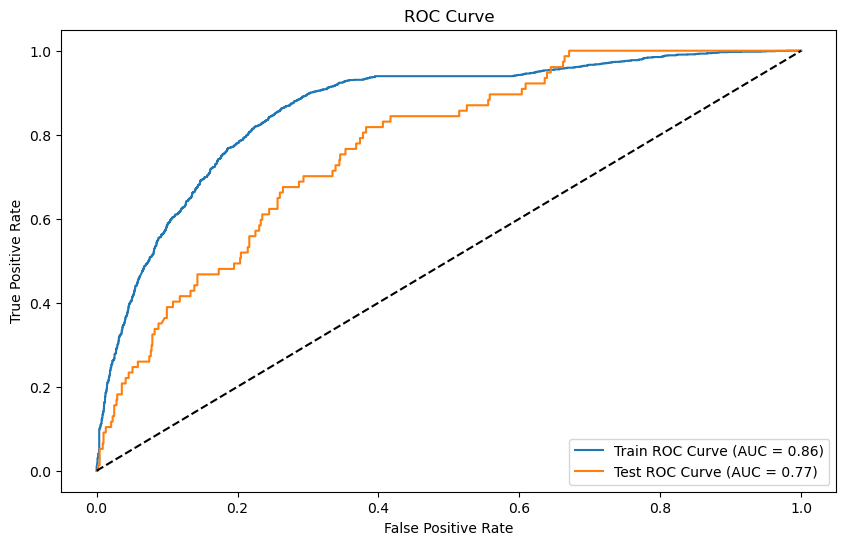

In [399]:

# Plot the ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob_svm)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

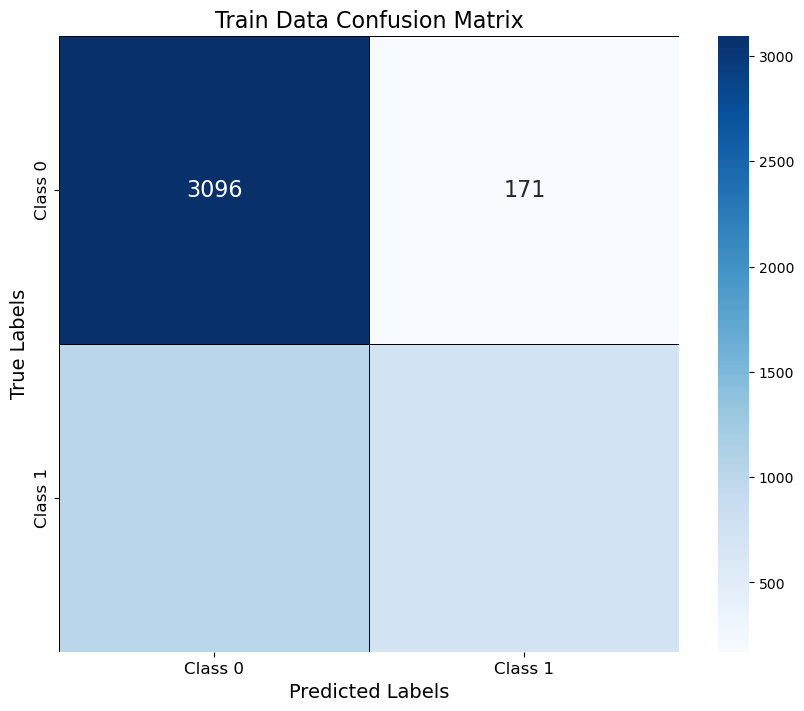

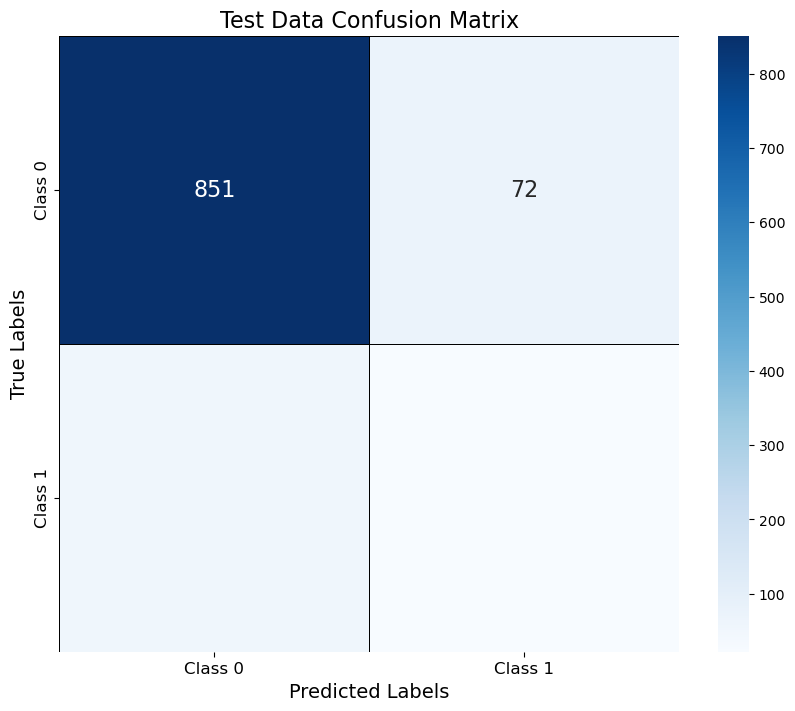

In [401]:
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))  # Increase figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 16},  # Increase font size of annotations
                linewidths=0.5, linecolor='black')  # Add lines around cells
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Define class labels (adjust as needed)
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix for train data
plot_confusion_matrix(conf_matrix_train, class_labels, 'Train Data Confusion Matrix')

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, class_labels, 'Test Data Confusion Matrix')


## 10 Fold CV on SVM

In [405]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10)

# Get cross-validated predictions for the training data
y_train_pred_cv = cross_val_predict(svm, X_train_preprocessed, y_train, cv=cv)
y_train_pred_prob_cv = cross_val_predict(svm, X_train_preprocessed, y_train, cv=cv, method='predict_proba')[:, 1]

# Train the SVM model on the entire training dataset
svm.fit(X_train_preprocessed, y_train)

# Get predictions for the test data
y_test_pred_svm = svm.predict(X_test_preprocessed)
y_test_pred_prob_svm = svm.predict_proba(X_test_preprocessed)[:, 1]

# Calculating the metrics for cross-validated train data
accuracy_train_cv = accuracy_score(y_train, y_train_pred_cv)
precision_train_cv = precision_score(y_train, y_train_pred_cv)
recall_train_cv = recall_score(y_train, y_train_pred_cv)
f1_train_cv = f1_score(y_train, y_train_pred_cv)
auc_train_cv = roc_auc_score(y_train, y_train_pred_prob_cv)
f3_train_cv = fbeta_score(y_train, y_train_pred_cv, beta=3)

# Calculating the metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred_svm)
precision_test = precision_score(y_test, y_test_pred_svm)
recall_test = recall_score(y_test, y_test_pred_svm)
f1_test = f1_score(y_test, y_test_pred_svm)
auc_test = roc_auc_score(y_test, y_test_pred_prob_svm)
f3_test = fbeta_score(y_test, y_test_pred_svm, beta=3)

# Show the metrics
print("Cross-Validated Train Data Metrics:")
print(f"Accuracy: {accuracy_train_cv:.4f}")
print(f"Precision: {precision_train_cv:.4f}")
print(f"Recall: {recall_train_cv:.4f}")
print(f"F1 Score: {f1_train_cv:.4f}")
print(f"F3 Score: {f3_train_cv:.4f}")
print(f"AUC Score: {auc_train_cv:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"F3 Score: {f3_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")


Cross-Validated Train Data Metrics:
Accuracy: 0.6962
Precision: 0.6427
Recall: 0.2781
F1 Score: 0.3882
F3 Score: 0.2949
AUC Score: 0.7328

Test Data Metrics:
Accuracy: 0.8730
Precision: 0.2340
Recall: 0.2857
F1 Score: 0.2573
F3 Score: 0.2795
AUC Score: 0.7708



Confusion Matrix for Cross-Validated Train Data:
[[2999  268]
 [1251  482]]

Confusion Matrix for Test Data:
[[851  72]
 [ 55  22]]


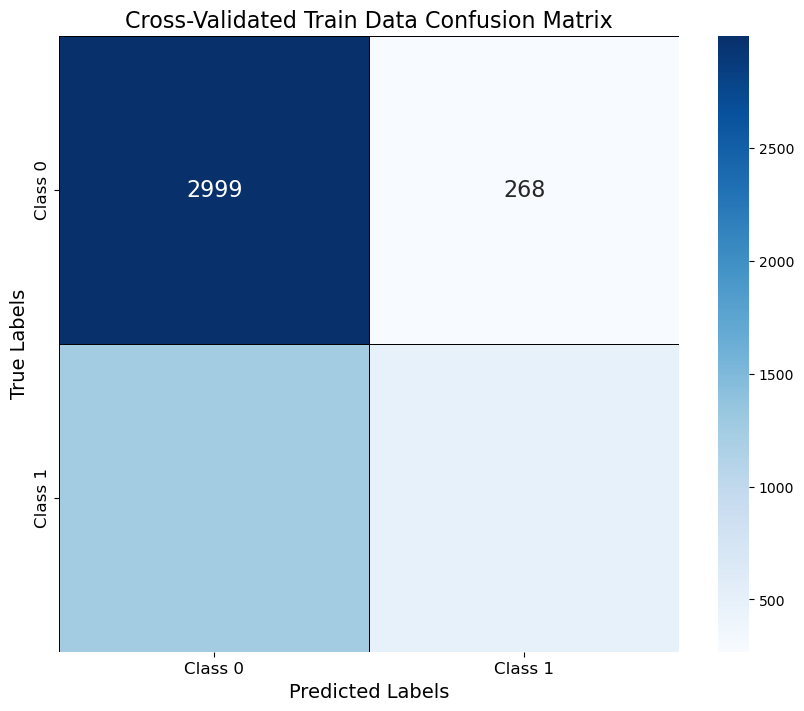

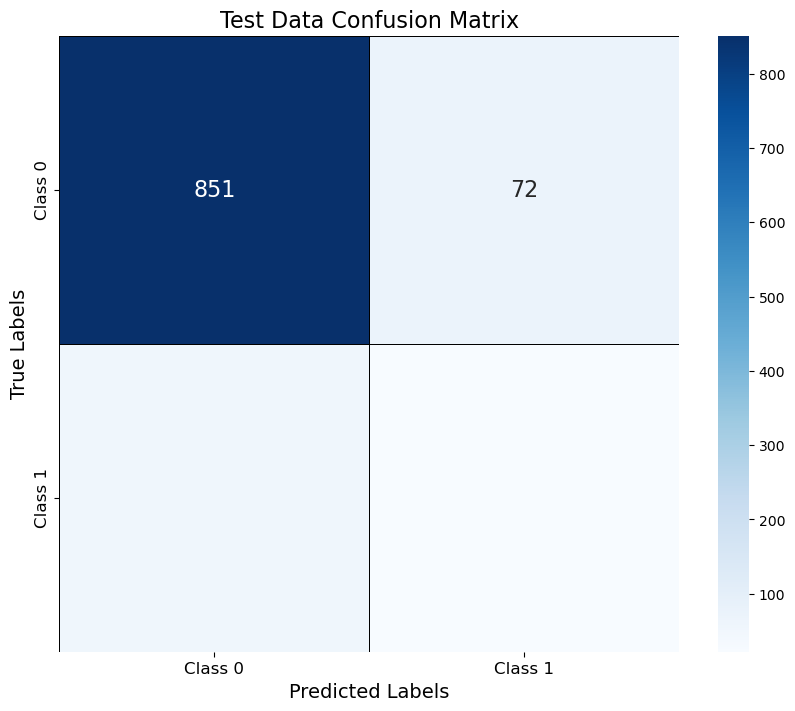

In [406]:
# Calculate confusion matrix for cross-validated training data
confusion_train_cv = confusion_matrix(y_train, y_train_pred_cv)
print("\nConfusion Matrix for Cross-Validated Train Data:")
print(confusion_train_cv)

# Calculate confusion matrix for test data
confusion_test = confusion_matrix(y_test, y_test_pred_svm)
print("\nConfusion Matrix for Test Data:")
print(confusion_test)

# You may also want to visualize the confusion matrices using a custom function (if you have one)
class_labels = ['Class 0', 'Class 1']
plot_confusion_matrix(confusion_train_cv, class_labels, 'Cross-Validated Train Data Confusion Matrix')
plot_confusion_matrix(confusion_test, class_labels, 'Test Data Confusion Matrix')


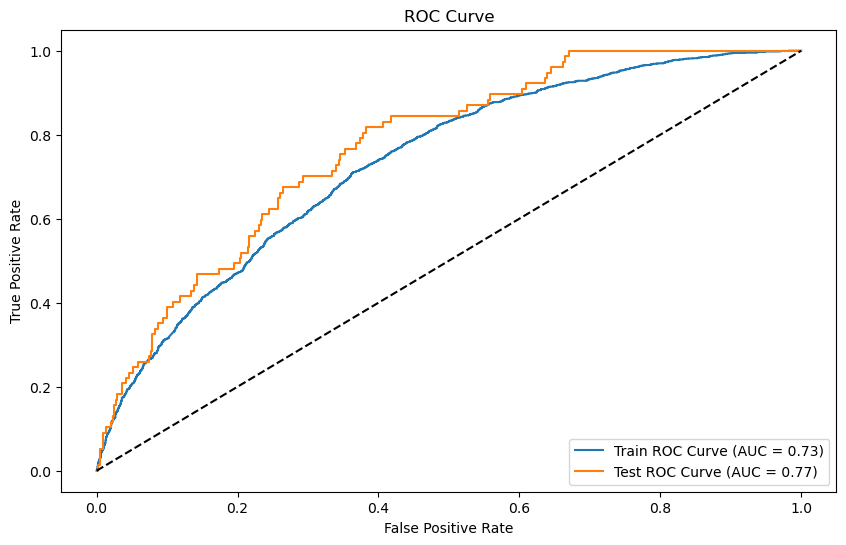

In [407]:
# Plot the ROC curves for cross-validated training data and test data
fpr_train_cv, tpr_train_cv, _ = roc_curve(y_train, y_train_pred_prob_cv)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_cv, tpr_train_cv, label='Train ROC Curve (AUC = %0.2f)' % auc_train_cv)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Grid Seach CV on SVM

In [415]:
# Define the grid of hyperparameters for SVM
grid_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']  # Specify the kernels you want to try
}

# Initialize the GridSearchCV for SVM
grid_search = GridSearchCV(SVC(probability=True, max_iter=5000), grid_param, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV on preprocessed training data
grid_search.fit(X_train_preprocessed, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

# Get predictions for the test data
y_best_pred = best_model.predict(X_test_preprocessed)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_best_pred))

# ROC AUC score for test data
print("ROC AUC Score for Best Model (Test Data):", roc_auc_score(y_test, best_model.predict_proba(X_test_preprocessed)[:, 1]))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       923
           1       0.23      0.29      0.26        77

    accuracy                           0.87      1000
   macro avg       0.59      0.60      0.59      1000
weighted avg       0.88      0.87      0.88      1000

ROC AUC Score for Best Model (Test Data): 0.7707925876939961


In [416]:
# Get predictions for the training data
y_train_pred = best_model.predict(X_train_preprocessed)

# Print confusion matrix for training data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_best_pred))



Confusion Matrix for Training Data:
[[3096  171]
 [1007  726]]
Confusion Matrix for Test Data:
[[851  72]
 [ 55  22]]


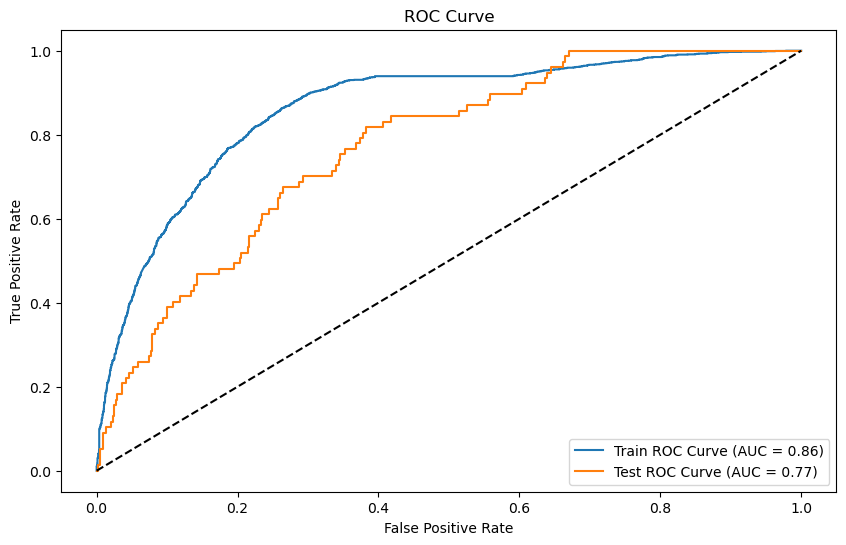

In [417]:
# Calculate ROC curve for the training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, best_model.predict_proba(X_train_preprocessed)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, best_model.predict_proba(X_test_preprocessed)[:, 1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = %0.2f)' % roc_auc_score(y_train, best_model.predict_proba(X_train_preprocessed)[:, 1]))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, best_model.predict_proba(X_test_preprocessed)[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Combining 10 Fold and Grid Search CV on SVM

In [423]:
# Define the hyperparameters grid to search
grid_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']  # Specify kernels to try
}

# Initialize the SVM model
svm_model = SVC(probability=True, max_iter=5000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=grid_param, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_preprocessed, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Print the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get cross-validated predictions for the training data
cv = StratifiedKFold(n_splits=10)
y_train_pred_cv = cross_val_predict(best_model, X_train_preprocessed, y_train, cv=cv)
y_train_pred_prob_cv = cross_val_predict(best_model, X_train_preprocessed, y_train, cv=cv, method='predict_proba')[:, 1]

# Get predictions for the test data
y_test_pred = best_model.predict(X_test_preprocessed)
y_test_pred_prob = best_model.predict_proba(X_test_preprocessed)[:, 1]

# Calculating the metrics for cross-validated train data
accuracy_train_cv = accuracy_score(y_train, y_train_pred_cv)
precision_train_cv = precision_score(y_train, y_train_pred_cv)
recall_train_cv = recall_score(y_train, y_train_pred_cv)
f1_train_cv = f1_score(y_train, y_train_pred_cv)
auc_train_cv = roc_auc_score(y_train, y_train_pred_prob_cv)
f3_train_cv = fbeta_score(y_train, y_train_pred_cv, beta=3)

# Calculating the metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred_prob)
f3_test = fbeta_score(y_test, y_test_pred, beta=3)

# Show the metrics
print("Cross-Validated Train Data Metrics:")
print(f"Accuracy: {accuracy_train_cv:.4f}")
print(f"Precision: {precision_train_cv:.4f}")
print(f"Recall: {recall_train_cv:.4f}")
print(f"F1 Score: {f1_train_cv:.4f}")
print(f"F3 Score: {f3_train_cv:.4f}")
print(f"AUC Score: {auc_train_cv:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"F3 Score: {f3_test:.4f}")
print(f"AUC Score: {auc_test:.4f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Cross-Validated Train Data Metrics:
Accuracy: 0.6962
Precision: 0.6427
Recall: 0.2781
F1 Score: 0.3882
F3 Score: 0.2949
AUC Score: 0.7328

Test Data Metrics:
Accuracy: 0.8730
Precision: 0.2340
Recall: 0.2857
F1 Score: 0.2573
F3 Score: 0.2795
AUC Score: 0.7708



Cross-Validated Train Data Confusion Matrix:
[[2999  268]
 [1251  482]]
True Positive (TP): 482
True Negative (TN): 2999
False Positive (FP): 268
False Negative (FN): 1251

Test Data Confusion Matrix:
[[851  72]
 [ 55  22]]
True Positive (TP): 22
True Negative (TN): 851
False Positive (FP): 72
False Negative (FN): 55


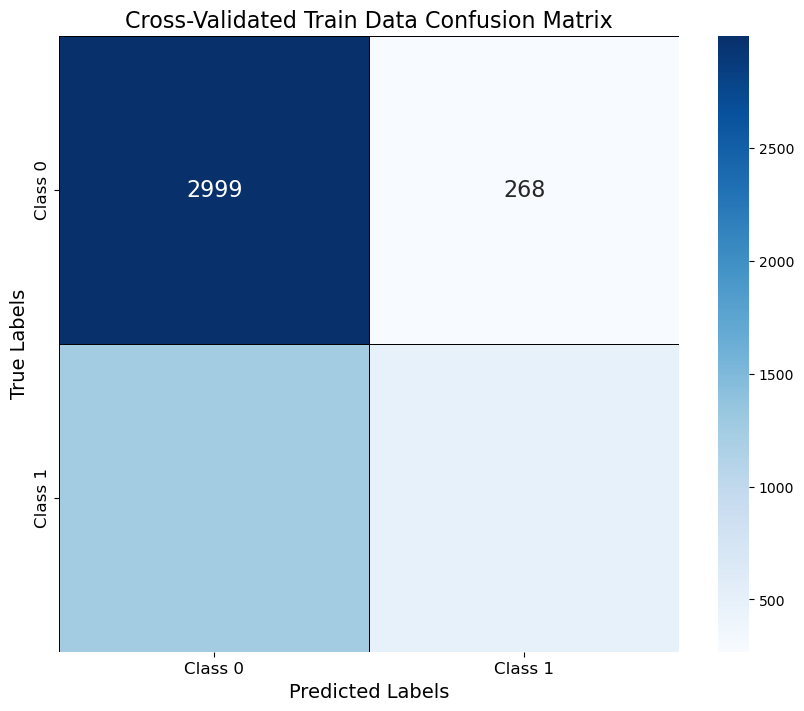

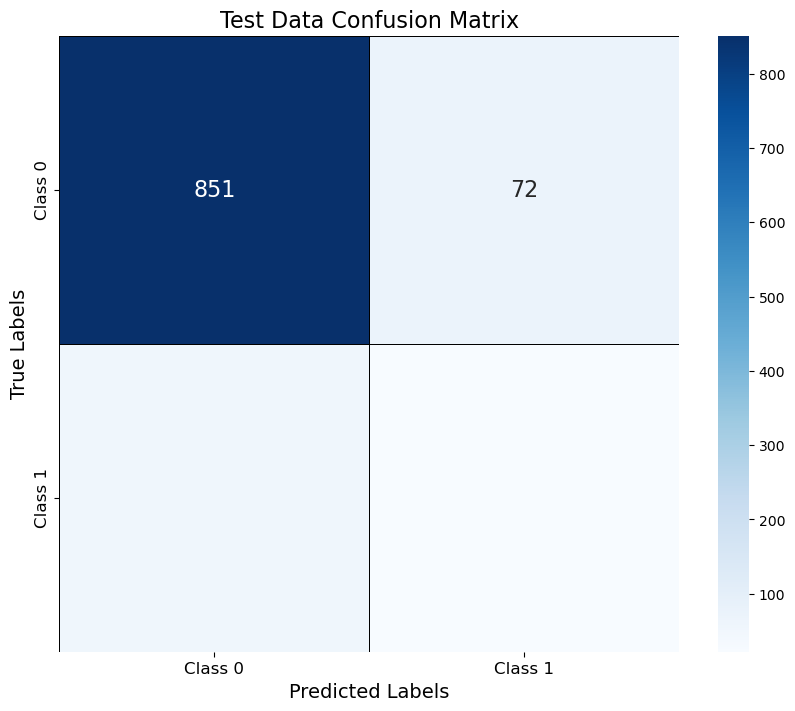

In [425]:
# Calculate confusion matrices
conf_matrix_train_cv = confusion_matrix(y_train, y_train_pred_cv)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate confusion matrix values
TN_train_cv, FP_train_cv, FN_train_cv, TP_train_cv = conf_matrix_train_cv.ravel()
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()

# Print confusion matrices with TP, TN, FP, FN values individually
print("\nCross-Validated Train Data Confusion Matrix:")
print(conf_matrix_train_cv)
print(f"True Positive (TP): {TP_train_cv}")
print(f"True Negative (TN): {TN_train_cv}")
print(f"False Positive (FP): {FP_train_cv}")
print(f"False Negative (FN): {FN_train_cv}")

print("\nTest Data Confusion Matrix:")
print(conf_matrix_test)
print(f"True Positive (TP): {TP_test}")
print(f"True Negative (TN): {TN_test}")
print(f"False Positive (FP): {FP_test}")
print(f"False Negative (FN): {FN_test}")

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 16},
                linewidths=0.5, linecolor='black')
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Define class labels (adjust as needed)
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix for train data
plot_confusion_matrix(conf_matrix_train_cv, class_labels, 'Cross-Validated Train Data Confusion Matrix')

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, class_labels, 'Test Data Confusion Matrix')


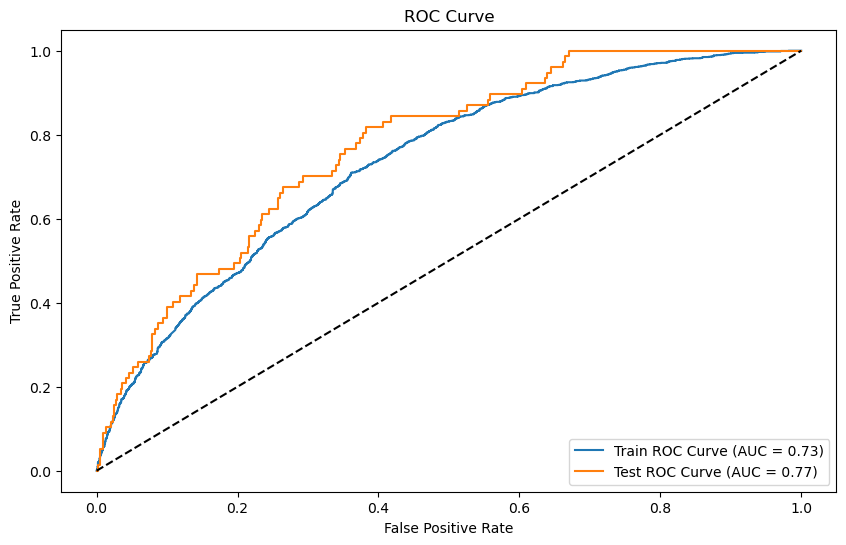

In [427]:

# Plot the ROC curves
fpr_train_cv, tpr_train_cv, _ = roc_curve(y_train, y_train_pred_prob_cv)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_cv, tpr_train_cv, label='Train ROC Curve (AUC = %0.2f)' % auc_train_cv)
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Installing Libraries for LIME and SHAP

In [430]:
!pip install lime

In [431]:
!pip install shap

## LIME on SVM with 5000 datapoints

In [440]:
from lime.lime_tabular import LimeTabularExplainer

# Extract the feature names after preprocessing
def get_feature_names(preprocessor, numeric_features, categorical_features):
    feature_names = []
    
    # Get feature names for numeric features
    for num_feature in numeric_features:
        feature_names.append(num_feature)
        
    # Get feature names for categorical features
    encoder = preprocessor.named_transformers_['cat']['encoder']
    cat_feature_names = encoder.get_feature_names_out(categorical_features)
    feature_names.extend(cat_feature_names)
    
    return feature_names

# Get feature names
feature_names = get_feature_names(preprocessor, numeric_features, categorical_features)
class_names = [str(i) for i in np.unique(y_train)]

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train_preprocessed, 
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True
)

# Choose an instance to explain
i = 0  # Change this index to explain different instances
exp = explainer.explain_instance(
    data_row=X_train_preprocessed[i], 
    predict_fn=best_model.predict_proba,  # Use the best model from GridSearchCV
    num_features=30
)

# Display the explanation in a notebook
exp.show_in_notebook(show_all=False, show_table=True)


## Most Important Features
The three most important features are:
1. SUM_TRAN_CLO_TENDENCY1M: 3.13
2. SUM_TRAN_AUT_TENDENCY3M: 2.10
3. CNT_TRAN_CLO_TENDENCY3M: 2.66

## Implementing SHAP

In [ ]:
# Define background data size and test sample size
background_data_size = 100  # Adjust based on your available memory
test_sample_size_for_shap = 50  # Adjust based on acceptable computation time

# Sample or cluster the background data
background_data = shap.sample(X_train_preprocessed, background_data_size)
# Or use k-means clustering
# background_data = shap.kmeans(X_train_preprocessed, background_data_size)

# Initialize the SHAP explainer with the best model from GridSearchCV
explainer = shap.KernelExplainer(best_model.predict_proba, background_data)

# Sample a subset of the test data
X_test_shap_sampled_indices = np.random.choice(X_test_preprocessed.shape[0], test_sample_size_for_shap, replace=False)
X_test_shap_sampled = X_test_preprocessed[X_test_shap_sampled_indices]

# Compute SHAP values
shap_values = explainer.shap_values(X_test_shap_sampled)

# Visualize the SHAP values for a specific instance
instance_index = 0  # Index of the instance to explain
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X_test_shap_sampled[instance_index], feature_names=feature_names)


  0%|          | 0/50 [00:00<?, ?it/s]